In [1152]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from scipy.stats import stats
from warnings import filterwarnings
filterwarnings("ignore")
import matplotlib.style
plt.style.use('fivethirtyeight')

In [1153]:
df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.head().T

,0,1,2,3,4
Unnamed: 0,1,2,3,4,5
vote,Labour,Labour,Labour,Labour,Labour
age,43,36,35,24,41
economic.cond.national,3,4,4,4,2
economic.cond.household,3,4,4,2,2
Blair,4,4,5,2,1
Hague,1,4,2,1,1
Europe,2,5,3,4,6
political.knowledge,2,2,2,0,2
gender,female,male,male,female,male


In [1154]:
df.columns

Index(['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender'],
      dtype='object')

In [1155]:
print('The dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

The dataset has 1525 rows and 10 columns


In [1156]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [1157]:
df=df.drop('Unnamed: 0',axis=1)

In [1158]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [1159]:
df.duplicated().sum()

8

In [1160]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [1161]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [1162]:
df[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


In [1163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [1164]:
Skewness=pd.DataFrame((round(df[num].skew(),2)), columns = ["Skewness"] ).sort_values('Skewness',ascending=False)
Skewness

,Skewness
Hague,0.15
age,0.14
Europe,-0.14
economic.cond.household,-0.15
economic.cond.national,-0.24
political.knowledge,-0.43
Blair,-0.54


In [1165]:
kurtosis1=pd.DataFrame((round(df[num].kurtosis(),2)), columns = ["kurtosis"] ).sort_values('kurtosis',ascending=False)
kurtosis1


,kurtosis
economic.cond.household,-0.21
economic.cond.national,-0.26
age,-0.95
Blair,-1.07
political.knowledge,-1.22
Europe,-1.24
Hague,-1.39


In [1166]:
cat=['economic.cond.national', 'economic.cond.household','Blair', 'Hague', 'Europe', 'political.knowledge']

In [1167]:
for i in cat:
    df[i]=df[i].astype("object")

In [1168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   object
 3   economic.cond.household  1525 non-null   object
 4   Blair                    1525 non-null   object
 5   Hague                    1525 non-null   object
 6   Europe                   1525 non-null   object
 7   political.knowledge      1525 non-null   object
 8   gender                   1525 non-null   object
dtypes: int64(1), object(8)
memory usage: 107.4+ KB


In [1169]:
print('The dataset has {} duplications'.format(df.duplicated().sum()))

The dataset has 8 duplications


In [1170]:
df.drop_duplicates(inplace=True)

In [1171]:
print('The dataset has {} duplications'.format(df.duplicated().sum()))

The dataset has 0 duplications


In [1172]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [1173]:
df.dtypes

vote                       object
age                         int64
economic.cond.national     object
economic.cond.household    object
Blair                      object
Hague                      object
Europe                     object
political.knowledge        object
gender                     object
dtype: object

In [1174]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['vote', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
['age']


In [1175]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0


In [1176]:
df[cat].describe().T

,count,unique,top,freq
vote,1517,2,Labour,1057
economic.cond.national,1517,5,3,604
economic.cond.household,1517,5,3,645
Blair,1517,5,4,833
Hague,1517,5,2,617
Europe,1517,11,11,338
political.knowledge,1517,4,2,776
gender,1517,2,female,808


Skewness of age: 0.14
Kurtosis of age: -0.94
Outliers of age: 0.0


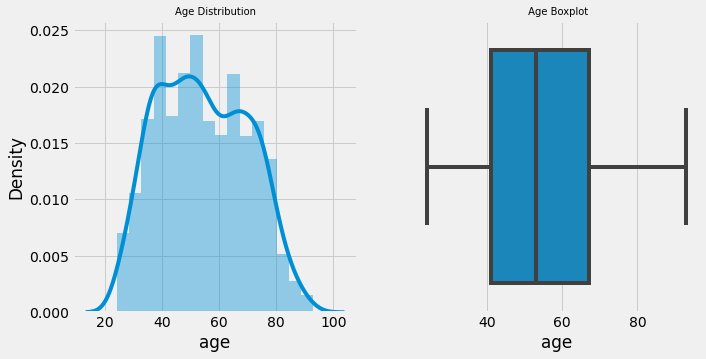

In [1177]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)

a = sns.distplot(df['age'] , ax=axes[0])
a.set_title("Age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[1])
a.set_title(" Age Boxplot",fontsize=10)

skew=df['age'].skew()
print('Skewness of age: %.2f' % skew)

kurtosis=df['age'].kurtosis()
print('Kurtosis of age: %.2f' % kurtosis)

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
outlier=((df['age'] < (Q1 - 1.5 * IQR)) | (df['age']> (Q3 + 1.5 * IQR))).sum()
print('Outliers of age: {}'.format(outlier/100))


In [1178]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    256
4    538
3    604
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    435
3    645
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    152
2    434
4    833
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    557
2    617
Name: Hague, dtype: int64


EUROPE :  11
2      77
7      86
10    101
1     109
9     111
8     111
5     123
4     126
3     128
6     207
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    249
0    454
2    776
Name: political.knowledge, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




In [1179]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

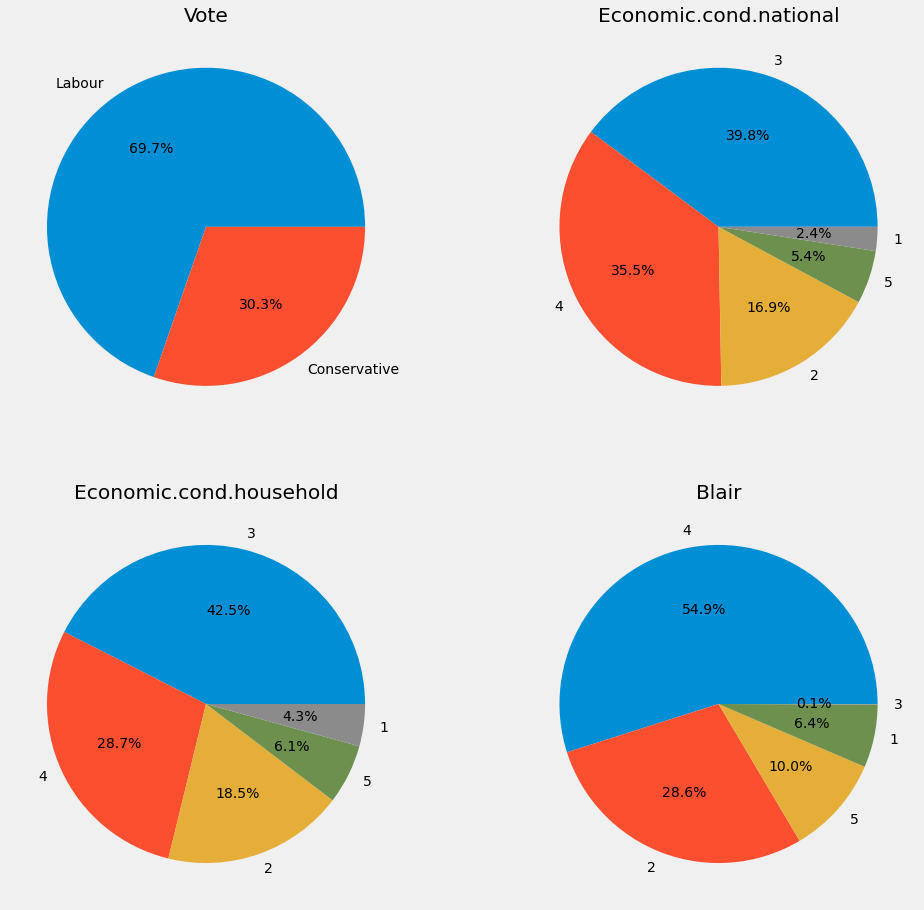

In [1180]:
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(221)
line1=plt.pie(df["vote"].value_counts(),labels=df["vote"].value_counts().index,autopct='%1.1f%%')
plt.title('Vote')

ax2=fig.add_subplot(222)
line2=plt.pie(df["economic.cond.national"].value_counts(),labels=df["economic.cond.national"].value_counts().index,autopct='%1.1f%%')
plt.title('Economic.cond.national')

ax3=fig.add_subplot(223)
line3=plt.pie(df["economic.cond.household"].value_counts(),labels=df["economic.cond.household"].value_counts().index,autopct='%1.1f%%')
plt.title('Economic.cond.household')

ax4=fig.add_subplot(224)
line4=plt.pie(df["Blair"].value_counts(),labels=df["Blair"].value_counts().index,autopct='%1.1f%%')
plt.title('Blair')
plt.show()



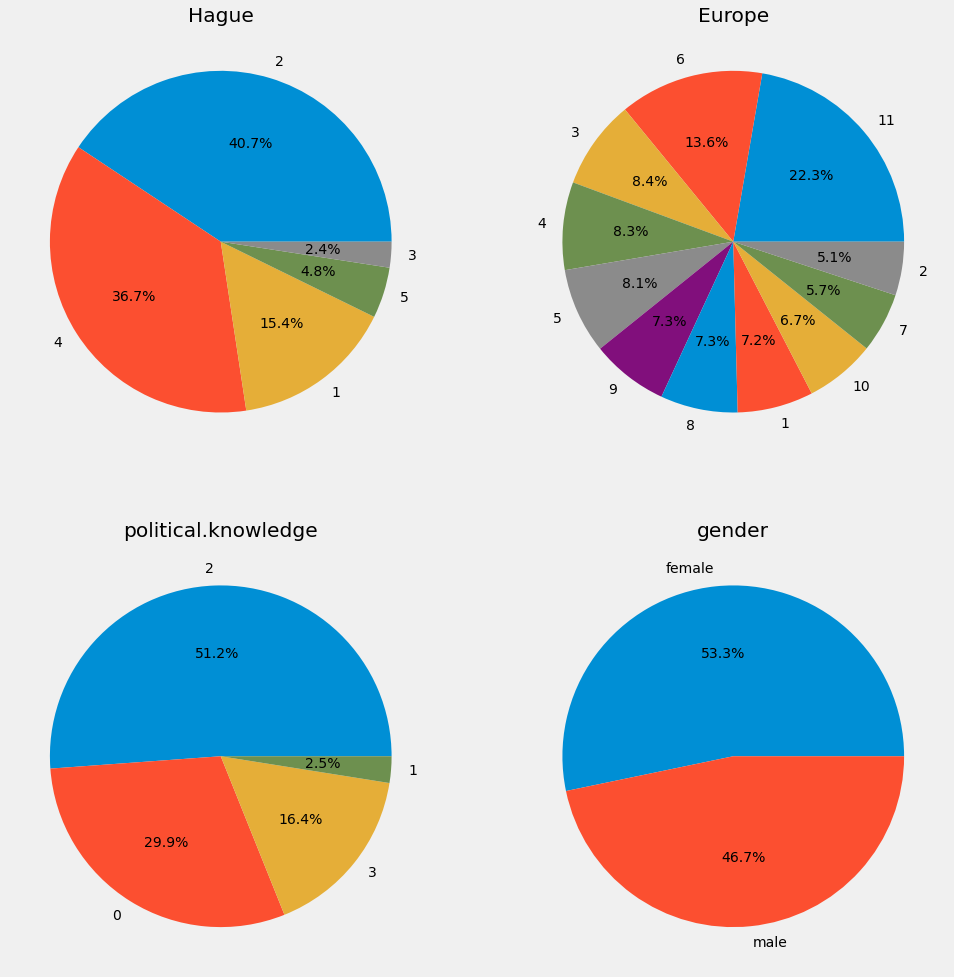

In [1181]:
fig=plt.figure(figsize=(15,25))
ax5=fig.add_subplot(321)
line5=plt.pie(df["Hague"].value_counts(),labels=df["Hague"].value_counts().index,autopct='%1.1f%%')
plt.title('Hague')

ax6=fig.add_subplot(322)
line6=plt.pie(df["Europe"].value_counts(),labels=df["Europe"].value_counts().index,autopct='%1.1f%%')
plt.title('Europe')

ax7=fig.add_subplot(323)
line7=plt.pie(df["political.knowledge"].value_counts(),labels=df["political.knowledge"].value_counts().index,autopct='%1.1f%%')
plt.title('political.knowledge')

ax8=fig.add_subplot(324)
line8=plt.pie(df["gender"].value_counts(),labels=df["gender"].value_counts().index,autopct='%1.1f%%')
plt.title('gender')
plt.show()

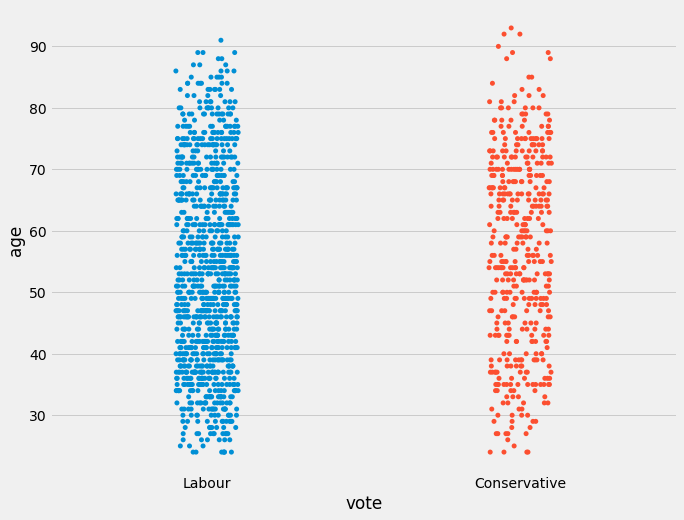

In [1182]:
plt.figure(figsize=(10,8))
sns.stripplot(df["vote"], df['age'], jitter=True) 
plt.show()

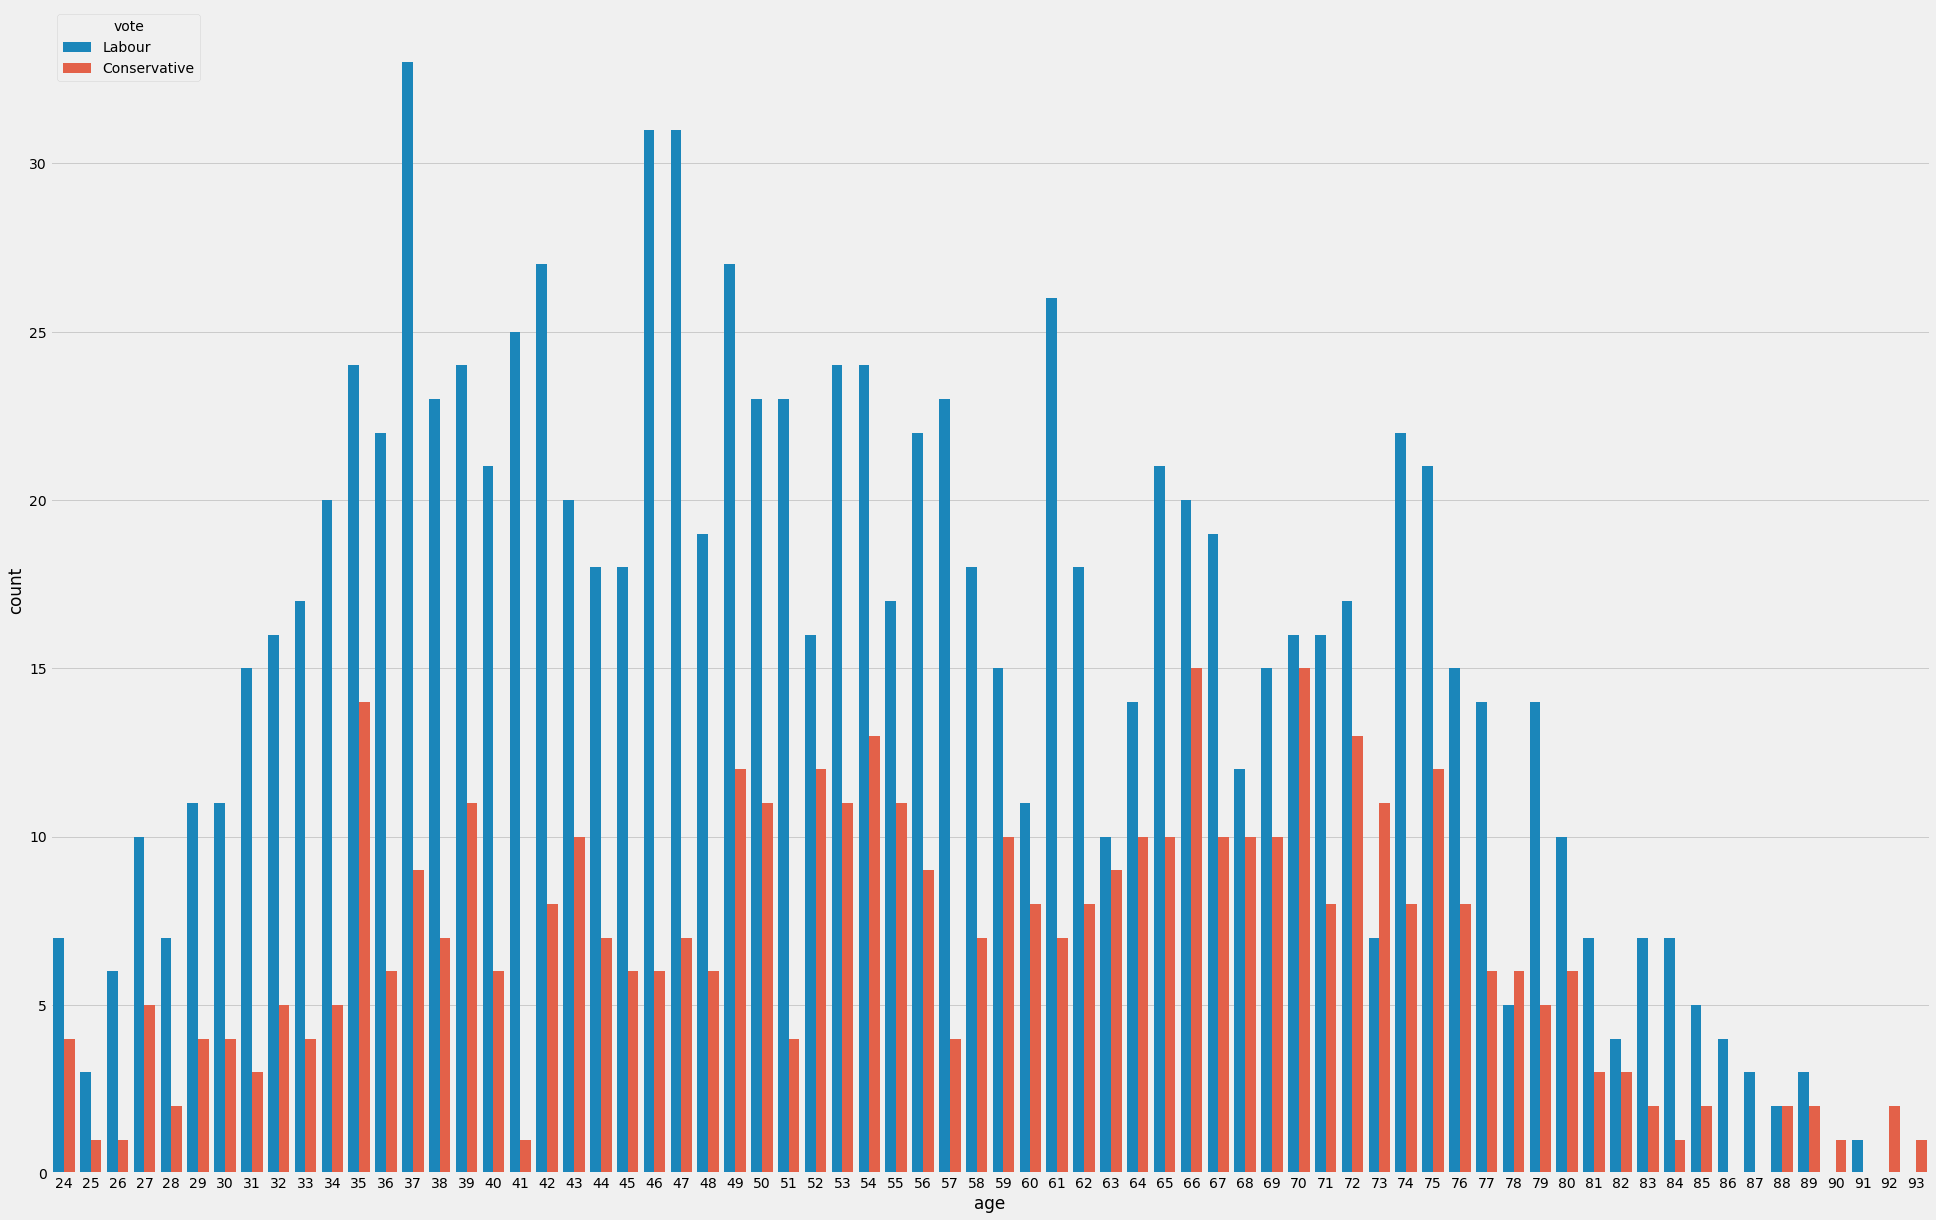

In [1183]:
plt.figure(figsize=(30,20))
sns.countplot(df['age'], hue=df['vote']) 
plt.show()

In [1184]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [1185]:
feature_list=df[['economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']].columns

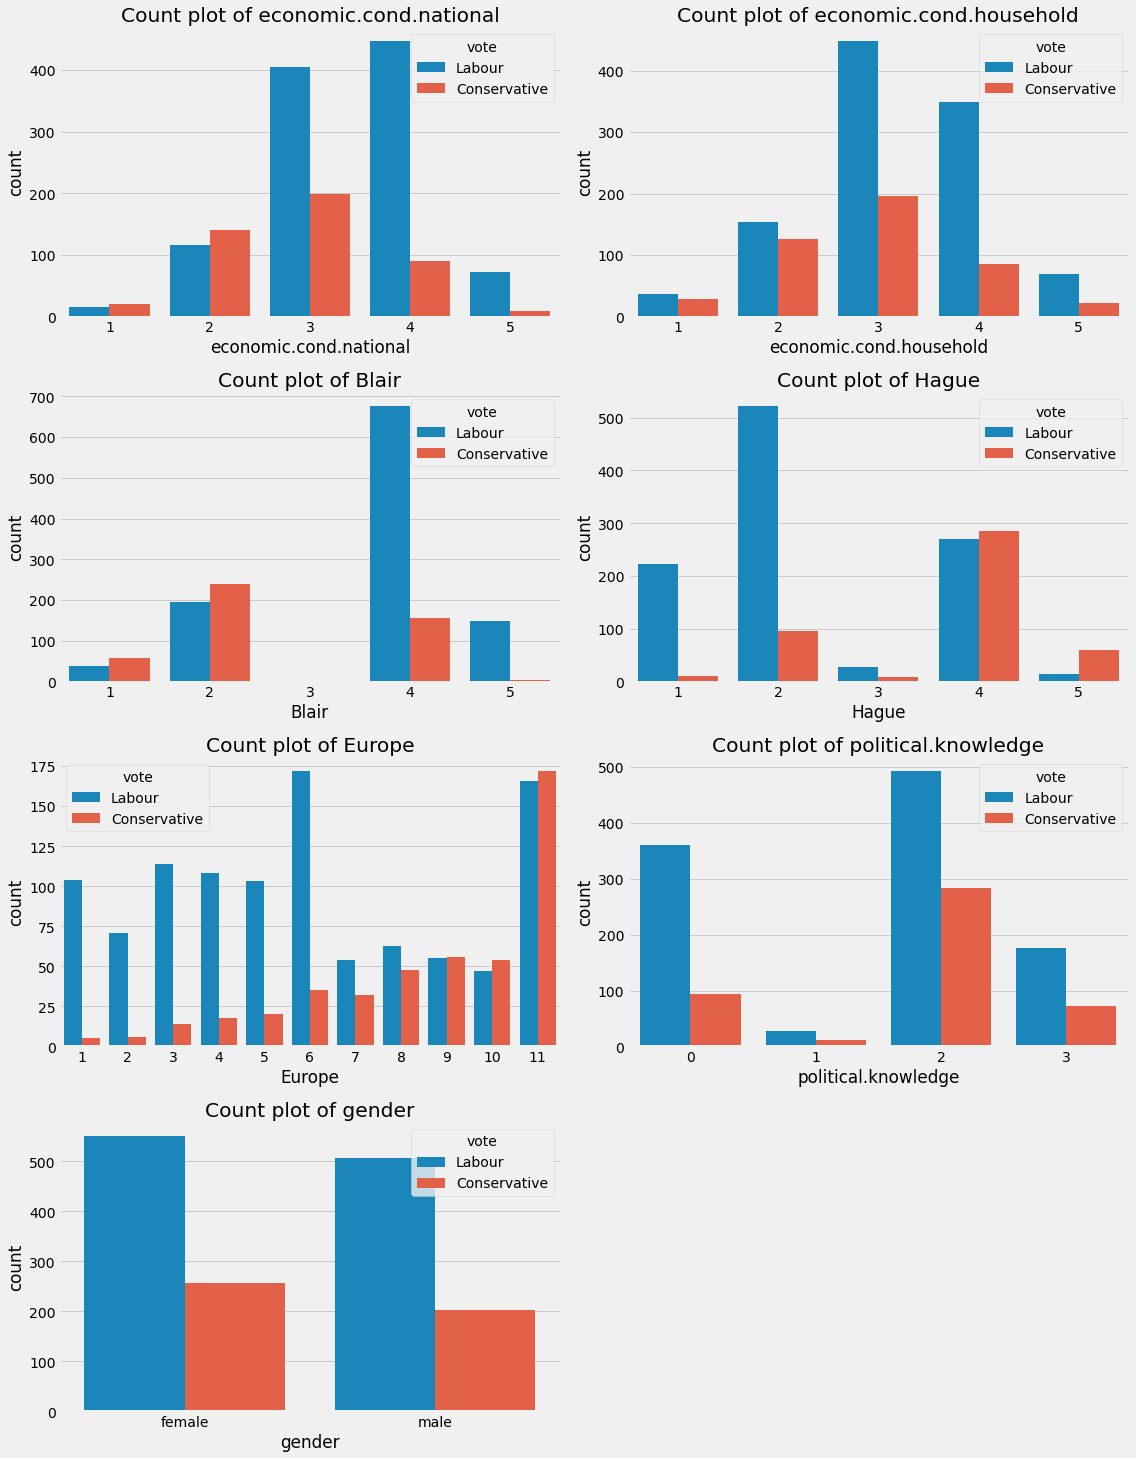

In [1186]:
plt.figure(figsize=(16,25))
for i in range(len(feature_list)):
    plt.subplot(5,2,i+1)
    sns.countplot(x=feature_list[i],hue=df['vote'],data=df)
    plt.title('Count plot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [1187]:
cat1=['economic.cond.national', 'economic.cond.household','Blair', 'Hague', 'Europe', 'political.knowledge']

In [1188]:
for i in cat1:
    df[i]=df[i].astype("int64")

In [1189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


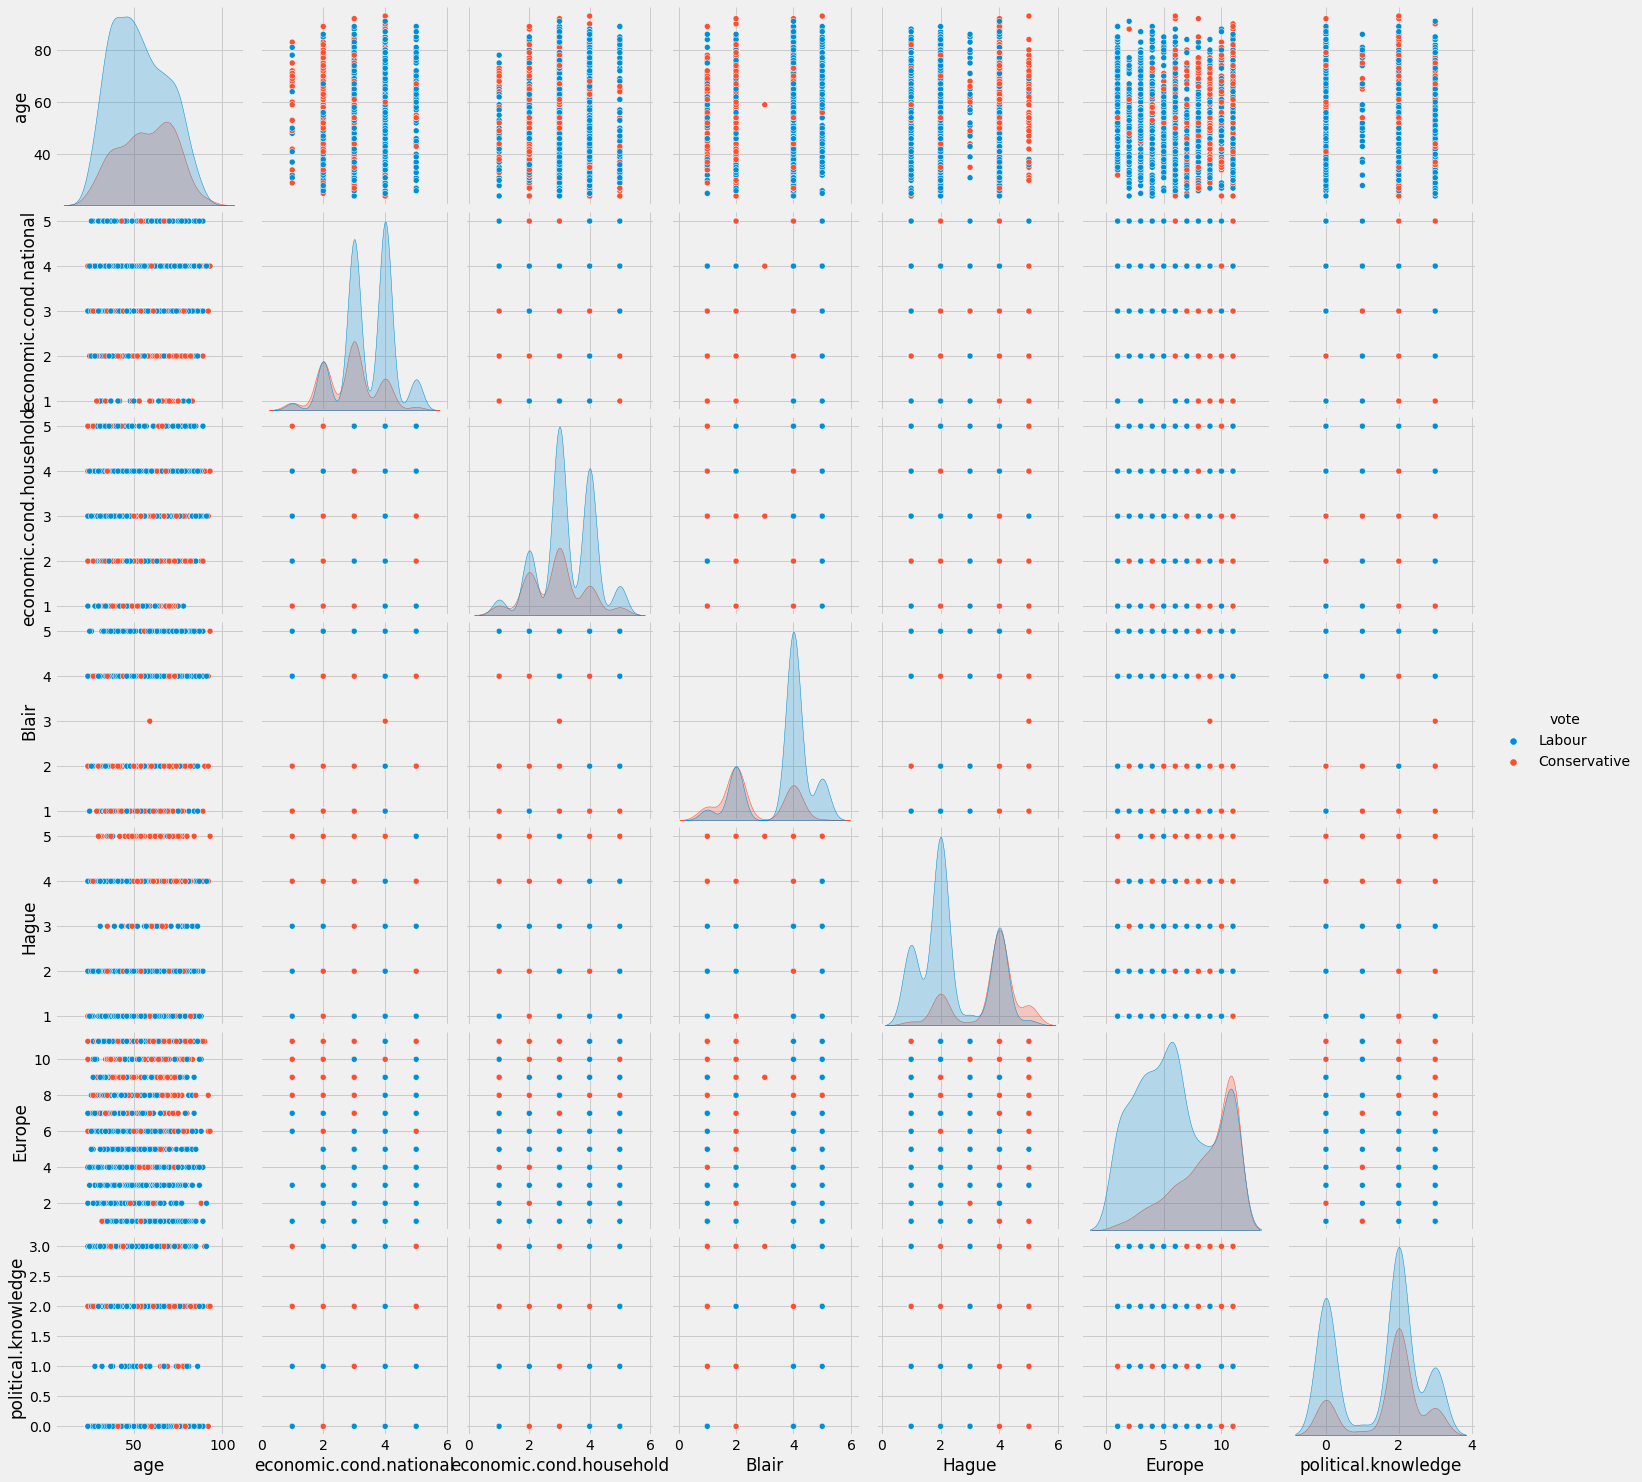

In [1190]:
sns.pairplot(df,size=3,hue='vote')
plt.show()

In [1191]:
corr = df.corr(method='pearson')

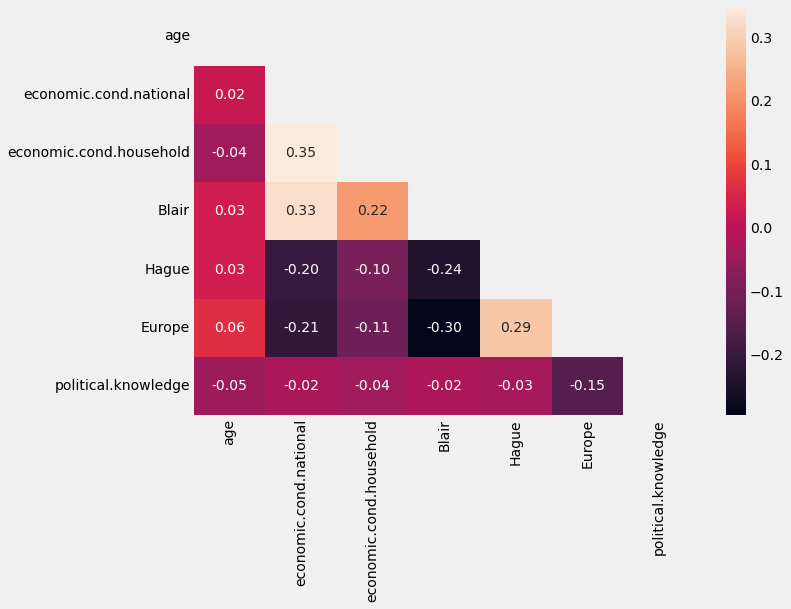

In [1192]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

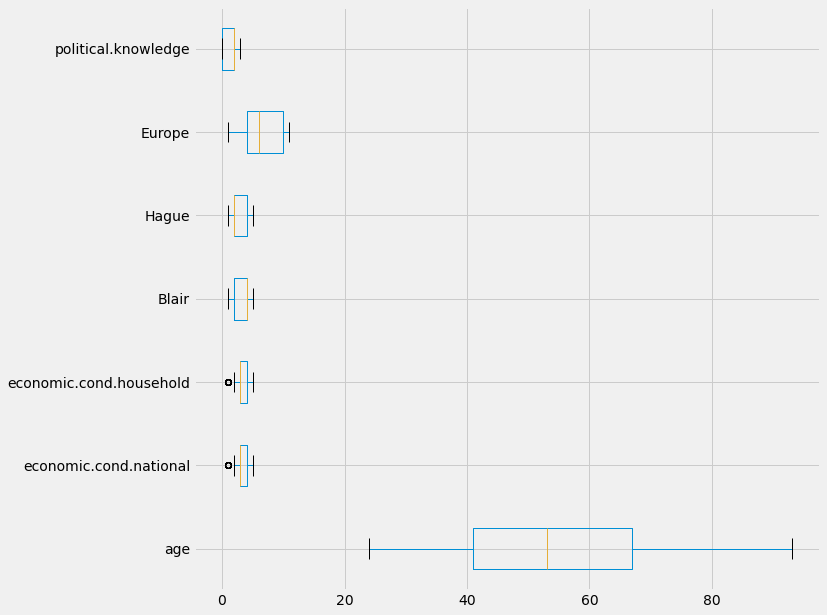

In [1193]:
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

In [1194]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [1195]:
feature_list=df[['economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge']].columns

In [1196]:
Q1 = df[feature_list].quantile(0.25)
Q3 = df[feature_list].quantile(0.75)
IQR = Q3 - Q1
outlier=pd.DataFrame((round(df[feature_list] < (Q1 - 1.5 * IQR)) | (df[feature_list]> (Q3 + 1.5 * IQR))).sum(), columns = ["Outliers"] ).sort_values('Outliers',ascending=False)
outlier/100

,Outliers
economic.cond.household,0.65
economic.cond.national,0.37
Blair,0.00
Hague,0.00
Europe,0.00
political.knowledge,0.00


In [1197]:
feature=df[['vote','gender']].columns

In [1198]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [1199]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [1200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int8 
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 130.1 KB


In [1201]:
pd.DataFrame(round(df['vote'].value_counts(normalize=True),3))

,vote
1,0.697
0,0.303


In [1202]:
Labour_Party = 0.697
Conservative_Party=0.303

In [1203]:
index=['Vote (Target Variable)']
data = pd.DataFrame({'Conservative Party - Class 0':[Conservative_Party],
        'Labour Party - Class 1':[Labour_Party]},index=index)
data.T

,Vote (Target Variable)
Conservative Party - Class 0,0.303
Labour Party - Class 1,0.697


## Train-Test Split

In [1204]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [1205]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [1206]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = df['vote']

In [1207]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [1208]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)


X_train (1061, 8)
X_test (456, 8)
train_labels (1061,)
test_labels (456,)


In [1209]:
##from sklearn.preprocessing import MinMaxScaler

In [1210]:
#X=MinMaxScaler()
#scaled_df = pd.DataFrame(X.fit_transform(df), columns=df.columns)
#scaled_df.head()

### Logistic Regression Model

In [1211]:
from sklearn.linear_model import LogisticRegression

In [1212]:
# Fit the Logistic Regression model
LR_model = LogisticRegression(random_state=1)
LR_model.fit(X_train, train_labels)

LogisticRegression(random_state=1)

## Predicting on Training and Test dataset

In [1213]:
ytrain_predict = LR_model.predict(X_train)
ytest_predict = LR_model.predict(X_test)


## Getting the Predicted Classes and Probs

In [1214]:
ytrain_predict_prob=LR_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.930218,0.069782
1,0.095258,0.904742
2,0.291956,0.708044
3,0.109076,0.890924
4,0.015769,0.984231


In [1215]:
ytest_predict_prob=LR_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.431606,0.568394
1,0.145965,0.854035
2,0.005896,0.994104
3,0.848037,0.151963
4,0.057768,0.942232


## Model Evaluation

### AUC and ROC for the training data

AUC: 0.89


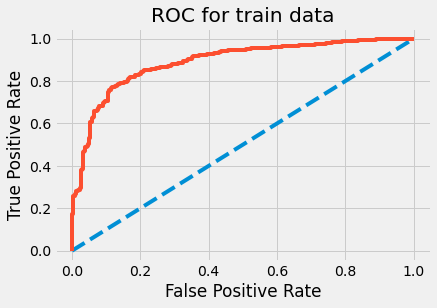

In [1216]:
# predict probabilities
probs = LR_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.2f' % lr_train_auc)
# calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for train data')
plt.show()

### AUC and ROC for the test data

AUC: 0.88


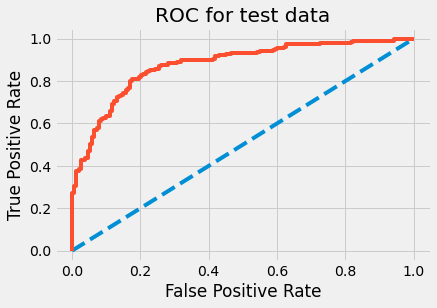

In [1217]:
# predict probabilities
probs = LR_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.2f' % lr_test_auc)
# calculate roc curve
lr_test_fpr, lr_test_tpr, lr_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for test data')
plt.show()


### Confusion Matrix for the training data

In [1218]:
metrics.confusion_matrix(train_labels, ytrain_predict)

array([[199, 108],
       [ 66, 688]], dtype=int64)

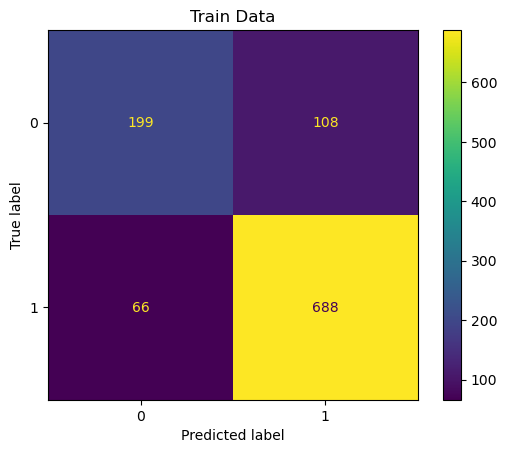

In [1219]:
plt.style.use('default')
metrics.plot_confusion_matrix(LR_model,X_train,train_labels);
plt.title('Train Data')
plt.show()

In [1220]:
#Train Data Accuracy
lr_train_acc=LR_model.score(X_train,train_labels) 
print('Accuracy Score on train data: %.2f' % lr_train_acc)

Accuracy Score on train data: 0.84


In [1221]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70       307
           1       0.86      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



lr_metrics on train data

In [1222]:
lr_metrics_c1=classification_report(train_labels, ytrain_predict,output_dict=True)
lr_metrics_train_c1=pd.DataFrame(lr_metrics_c1).transpose()
lr_train_precision_C1=round(lr_metrics_train_c1.loc["1"][0],2)
lr_train_recall_C1=round(lr_metrics_train_c1.loc["1"][1],2)
lr_train_f1_C1=round(lr_metrics_train_c1.loc["1"][2],2)
print ('lr_train_precision_c1 ',lr_train_precision_C1)
print ('lr_train_recall_c1 ',lr_train_recall_C1)
print ('lr_train_f1_c1 ',lr_train_f1_C1)

lr_train_precision_c1  0.86
lr_train_recall_c1  0.91
lr_train_f1_c1  0.89


In [1223]:
lr_metrics_C0=classification_report(train_labels, ytrain_predict,output_dict=True)
lr_metrics_train_C0=pd.DataFrame(lr_metrics_C0).transpose()
lr_train_precision_C0=round(lr_metrics_train_C0.loc["0"][0],2)
lr_train_recall_C0=round(lr_metrics_train_C0.loc["0"][1],2)
lr_train_f1_C0=round(lr_metrics_train_C0.loc["0"][2],2)
print ('lr_train_precision_C0 ',lr_train_precision_C0)
print ('lr_train_recall_C0 ',lr_train_recall_C0)
print ('lr_train_f1_C0 ',lr_train_f1_C0)

lr_train_precision_C0  0.75
lr_train_recall_C0  0.65
lr_train_f1_C0  0.7


### Confusion Matrix for test data

Text(0.5, 1.0, 'Test Data')

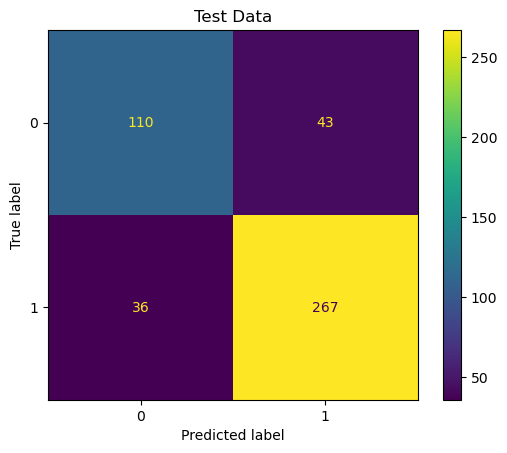

In [1224]:
metrics.plot_confusion_matrix(LR_model,X_test,test_labels);
plt.style.use('default')
plt.title('Test Data')

In [1225]:
#Test Data Accuracy
lr_test_acc=LR_model.score(X_test,test_labels)
print('Accuracy Score on test data: %.2f' % lr_test_acc)

Accuracy Score on test data: 0.83


In [1226]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



lr_metrics on test data

In [1227]:
lr_metrics_c1=classification_report(test_labels, ytest_predict,output_dict=True)
lr_metrics_test_c1=pd.DataFrame(lr_metrics_c1).transpose()
lr_test_precision_C1=round(lr_metrics_test_c1.loc["1"][0],2)
lr_test_recall_C1=round(lr_metrics_test_c1.loc["1"][1],2)
lr_test_f1_C1=round(lr_metrics_test_c1.loc["1"][2],2)
print ('lr_test_precision_c1 ',lr_test_precision_C1)
print ('lr_test_recall_c1 ',lr_test_recall_C1)
print ('lr_test_f1_c1 ',lr_test_f1_C1)

lr_test_precision_c1  0.86
lr_test_recall_c1  0.88
lr_test_f1_c1  0.87


In [1228]:
lr_metrics_C0=classification_report(test_labels, ytest_predict,output_dict=True)
lr_metrics_test_C0=pd.DataFrame(lr_metrics_C0).transpose()
lr_test_precision_C0=round(lr_metrics_test_C0.loc["0"][0],2)
lr_test_recall_C0=round(lr_metrics_test_C0.loc["0"][1],2)
lr_test_f1_C0=round(lr_metrics_test_C0.loc["0"][2],2)
print ('lr_test_precision ',lr_test_precision_C0)
print ('lr_test_recall ',lr_test_recall_C0)
print ('lr_test_f1 ',lr_test_f1_C0)

lr_test_precision  0.75
lr_test_recall  0.72
lr_test_f1  0.74


### Logistic Regression Tuned Model

#### 1- Applying GridSearchCV for Logistic Regression

In [1229]:
param_grid = {
  'solver':['newton-cg','liblinear','lbfgs'],
    'max_iter':[10000,15000],
    'penalty':['l2','none','l1'],
    'verbose':[True],
    'n_jobs':[2],
    'tol':[0.001,0.00000001],
}

dtcl = LogisticRegression(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 3,scoring='f1')

In [1230]:
grid_search.fit(X_train, train_labels)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concu

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=1),
             param_grid={'max_iter': [10000, 15000], 'n_jobs': [2],
                         'penalty': ['l2', 'none', 'l1'],
                         'solver': ['newton-cg', 'liblinear', 'lbfgs'],
                         'tol': [0.001, 1e-08], 'verbose': [True]},
             scoring='f1')

In [1231]:
best_grid = grid_search.best_estimator_
best_grid

LogisticRegression(max_iter=10000, n_jobs=2, random_state=1, solver='liblinear',
                   tol=1e-08, verbose=True)

In [1232]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)


## Getting the Predicted Classes and Probs

In [1233]:
ytrain_predict_prob=best_grid.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.933935,0.066065
1,0.099476,0.900524
2,0.283888,0.716112
3,0.115504,0.884496
4,0.017759,0.982241


In [1234]:
ytest_predict_prob=best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.427678,0.572322
1,0.155819,0.844181
2,0.006242,0.993758
3,0.842274,0.157726
4,0.066388,0.933612


In [1235]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, best_grid.coef_[0][idx]))

The coefficient for age is -0.012429720005631948
The coefficient for economic.cond.national is 0.6660207875630898
The coefficient for economic.cond.household is 0.09273125552029428
The coefficient for Blair is 0.6199222689215454
The coefficient for Hague is -0.7994358877061684
The coefficient for Europe is -0.20263749206887618
The coefficient for political.knowledge is -0.30364699901497305
The coefficient for gender is 0.20684227531673044


## Model Evaluation

### AUC and ROC for the training data

In [1236]:
#Train Data Accuracy
lrt_train_acc=best_grid.score(X_train,train_labels) 
print('Accuracy Score on train data: %.2f' % lrt_train_acc)

Accuracy Score on train data: 0.84


In [1237]:
#test Data Accuracy
lrt_test_acc=best_grid.score(X_test,test_labels) 
print('Accuracy Score on test data: %.2f' % lrt_test_acc)

Accuracy Score on test data: 0.83


AUC: 0.89


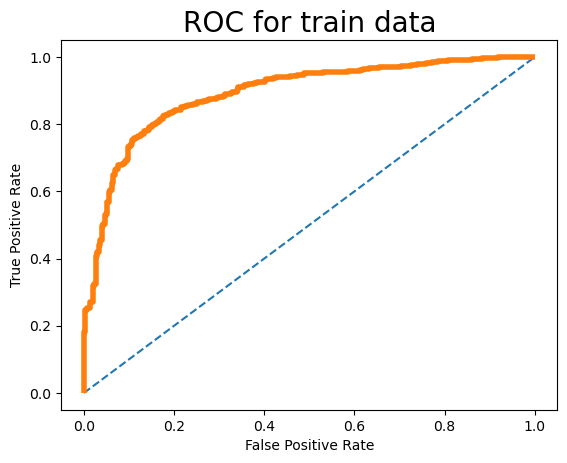

In [1238]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lrt_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.2f' % lrt_train_auc)
# calculate roc curve
lrt_train_fpr, lrt_train_tpr, lrt_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.style.use('fivethirtyeight')
plt.plot(lrt_train_fpr, lrt_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for train data')
plt.show()

### AUC and ROC for the test data

AUC: 0.88


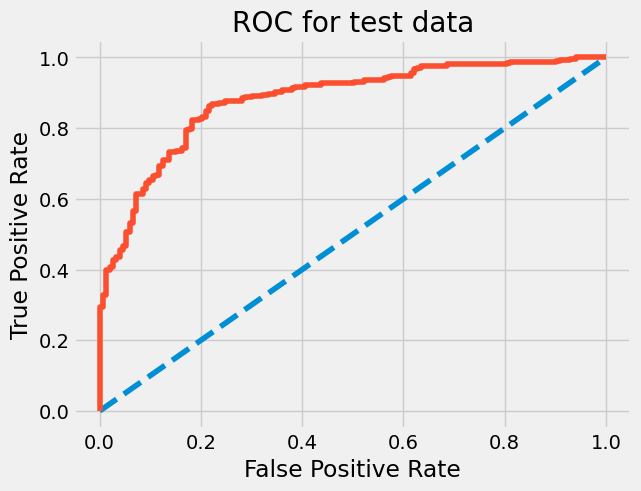

In [1239]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lrt_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.2f' % lrt_test_auc)
# calculate roc curve
lrt_test_fpr, lrt_test_tpr, lrt_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.style.use('fivethirtyeight')
plt.plot(lrt_test_fpr, lrt_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for test data')
plt.show()


### Confusion Matrix for the training data

In [1240]:
metrics.confusion_matrix(train_labels, ytrain_predict)

array([[198, 109],
       [ 64, 690]], dtype=int64)

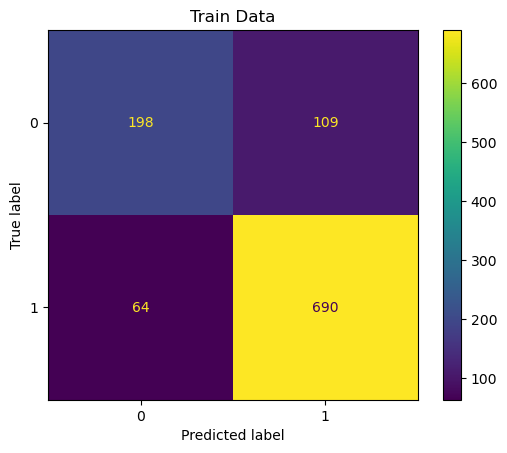

In [1241]:
plt.style.use('default')
metrics.plot_confusion_matrix(best_grid,X_train,train_labels);
plt.title('Train Data')
plt.show()

In [1242]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.64      0.70       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



lrt_metrics on train data

In [1243]:
lrt_metrics_C1=classification_report(train_labels, ytrain_predict,output_dict=True)
lrt_metrics_train_C1=pd.DataFrame(lrt_metrics_C1).transpose()
lrt_train_f1_C1=round(lrt_metrics_train_C1.loc["1"][2],2)
lrt_train_recall_C1=round(lrt_metrics_train_C1.loc["1"][1],2)
lrt_train_precision_C1=round(lrt_metrics_train_C1.loc["1"][0],2)
print ('lrt_train_precision ',lrt_train_precision_C1)
print ('lrt_train_recall ',lrt_train_recall_C1)
print ('lrt_train_f1 ',lrt_train_f1_C1)

lrt_train_precision  0.86
lrt_train_recall  0.92
lrt_train_f1  0.89


In [1244]:
lrt_metrics_C0=classification_report(train_labels, ytrain_predict,output_dict=True)
lrt_metrics_train_C0=pd.DataFrame(lrt_metrics_C0).transpose()
lrt_train_f1_C0=round(lrt_metrics_train_C0.loc["0"][2],2)
lrt_train_recall_C0=round(lrt_metrics_train_C0.loc["0"][1],2)
lrt_train_precision_C0=round(lrt_metrics_train_C0.loc["0"][0],2)
print ('lrt_train_precision ',lrt_train_precision_C0)
print ('lrt_train_recall ',lrt_train_recall_C0)
print ('lrt_train_f1 ',lrt_train_f1_C0)

lrt_train_precision  0.76
lrt_train_recall  0.64
lrt_train_f1  0.7


### Confusion Matrix for test data

Text(0.5, 1.0, 'Test Data')

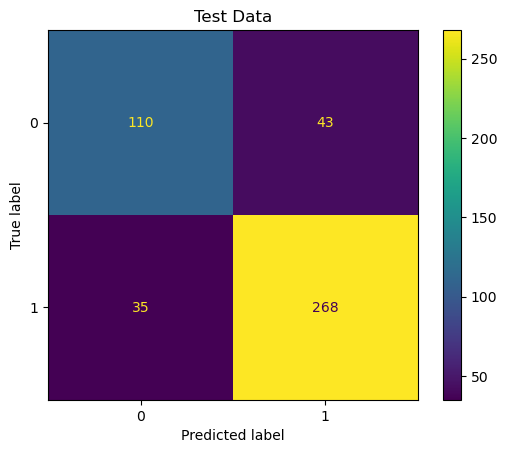

In [1245]:
metrics.plot_confusion_matrix(best_grid,X_test,test_labels);
plt.style.use('default')
plt.title('Test Data')

In [1246]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



lrt_metrics on test data

In [1247]:
lrt_metrics_C1=classification_report(test_labels, ytest_predict,output_dict=True)
lrt_metrics_test_C1=pd.DataFrame(lrt_metrics_C1).transpose()
lrt_test_f1_C1=round(lrt_metrics_test_C1.loc["1"][2],2)
lrt_test_recall_C1=round(lrt_metrics_test_C1.loc["1"][1],2)
lrt_test_precision_C1=round(lrt_metrics_test_C1.loc["1"][0],2)
print ('lrt_test_precision ',lrt_test_precision_C1)
print ('lrt_test_recall ',lrt_test_recall_C1)
print ('lrt_test_f1 ',lrt_test_f1_C1)

lrt_test_precision  0.86
lrt_test_recall  0.88
lrt_test_f1  0.87


In [1248]:
lrt_metrics_C0=classification_report(test_labels, ytest_predict,output_dict=True)
lrt_metrics_test_C0=pd.DataFrame(lrt_metrics_C0).transpose()
lrt_test_f1_C0=round(lrt_metrics_test_C0.loc["0"][2],2)
lrt_test_recall_C0=round(lrt_metrics_test_C0.loc["0"][1],2)
lrt_test_precision_C0=round(lrt_metrics_test_C0.loc["0"][0],2)
print ('lrt_test_precision ',lrt_test_precision_C0)
print ('lrt_test_recall ',lrt_test_recall_C0)
print ('lrt_test_f1 ',lrt_test_f1_C0)

lrt_test_precision  0.76
lrt_test_recall  0.72
lrt_test_f1  0.74


#### LDA Model

In [1249]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, train_labels)

LinearDiscriminantAnalysis()

In [1250]:
ytrain_predict = LDA_model.predict(X_train)
ytest_predict = LDA_model.predict(X_test)


## Getting the Predicted Classes and Probs

In [1251]:
ytrain_predict_prob=LDA_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.949216,0.050784
1,0.078241,0.921759
2,0.307389,0.692611
3,0.078963,0.921037
4,0.012161,0.987839


In [1252]:
ytest_predict_prob=LDA_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.462093,0.537907
1,0.133955,0.866045
2,0.006414,0.993586
3,0.861210,0.138790
4,0.056545,0.943455


## Model Evaluation

### AUC and ROC for the training data

AUC: 0.89


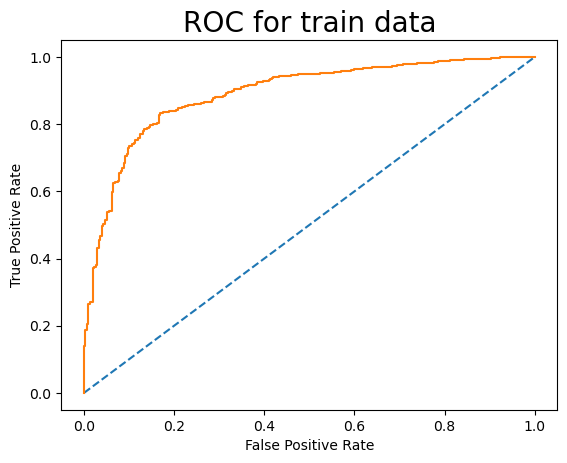

In [1253]:
# predict probabilities
probs_lda_train = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_lda = probs_lda_train[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(train_labels, probs_lda)
print('AUC: %.2f' % lda_train_auc)
# calculate roc curv
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(train_labels, probs_lda)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr)
plt.style.use('fivethirtyeight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for train data')
plt.show()

### AUC and ROC for the test data

AUC: 0.89


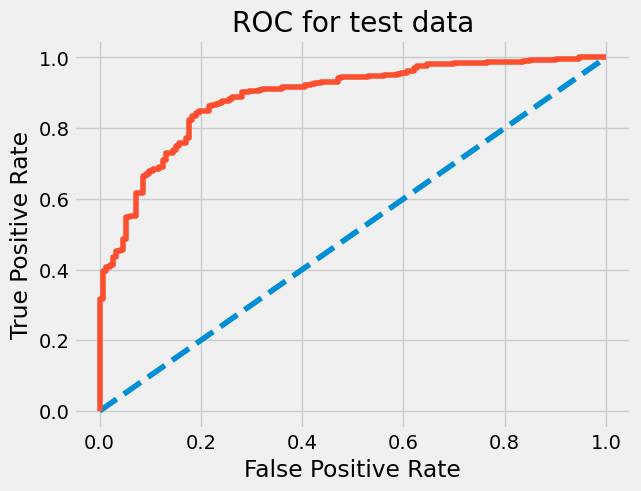

In [1254]:
# predict probabilities
probs_lda_test = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_lda = probs_lda_test[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(test_labels, probs_lda)
print('AUC: %.2f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_testthresholds = roc_curve(test_labels, probs_lda)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)
plt.style.use('fivethirtyeight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for test data')
plt.show()


### Confusion Matrix for the training data

In [1255]:
metrics.confusion_matrix(train_labels, ytrain_predict)

array([[200, 107],
       [ 69, 685]], dtype=int64)

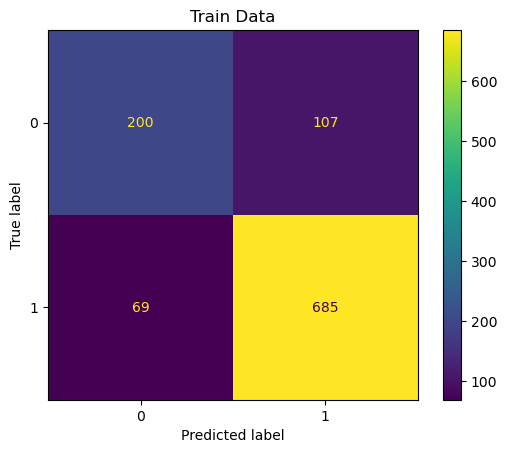

In [1256]:
plt.style.use('default')
metrics.plot_confusion_matrix(LDA_model,X_train,train_labels);
plt.title('Train Data')
plt.show()

In [1257]:
#Train Data Accuracy
lda_train_acc=LDA_model.score(X_train,train_labels) 
print('Accuracy Score on train data: %.2f' % lda_train_acc)

Accuracy Score on train data: 0.83


In [1258]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



lda_metrics on train data

In [1259]:
lda_metrics_C0=classification_report(train_labels, ytrain_predict,output_dict=True)
lda_metrics_train_C0=pd.DataFrame(lda_metrics_C0).transpose()
lda_train_f1_C0=round(lda_metrics_train_C0.loc["1"][2],2)
lda_train_recall_C0=round(lda_metrics_train_C0.loc["1"][1],2)
lda_train_precision_C0=round(lda_metrics_train_C0.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.86
lda_train_recall  0.91
lda_train_f1  0.89


In [1260]:
lda_metrics_C0=classification_report(train_labels, ytrain_predict,output_dict=True)
lda_metrics_train_C0=pd.DataFrame(lda_metrics_C0).transpose()
lda_train_f1_C0=round(lda_metrics_train_C0.loc["0"][2],2)
lda_train_recall_C0=round(lda_metrics_train_C0.loc["0"][1],2)
lda_train_precision_C0=round(lda_metrics_train_C0.loc["0"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.86
lda_train_recall  0.91
lda_train_f1  0.89


### Confusion Matrix for test data

Text(0.5, 1.0, 'Test Data')

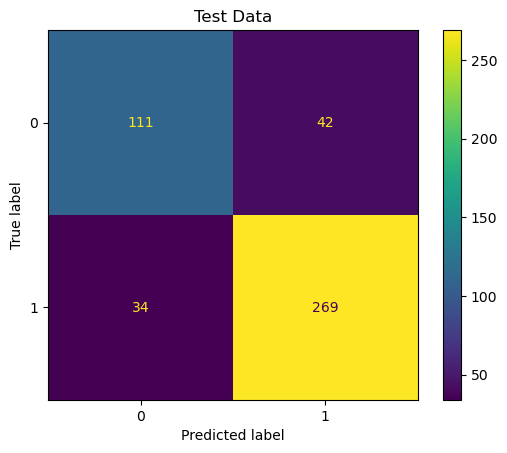

In [1261]:
metrics.plot_confusion_matrix(LDA_model,X_test,test_labels);
plt.style.use('default')
plt.title('Test Data')

In [1262]:
#Test Data Accuracy
lda_test_acc=LDA_model.score(X_test,test_labels)
print('Accuracy Score on test data: %.2f' % lda_test_acc)

Accuracy Score on test data: 0.83


In [1263]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



lda_metrics on test data

In [1264]:
lda_metrics_C1=classification_report(test_labels, ytest_predict,output_dict=True)
lda_metrics_test_C1=pd.DataFrame(lda_metrics_C1).transpose()
lda_test_f1_C1=round(lda_metrics_test_C1.loc["1"][2],2)
lda_test_recall_C1=round(lda_metrics_test_C1.loc["1"][1],2)
lda_test_precision_C1=round(lda_metrics_test_C1.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.86
lda_test_recall  0.89
lda_test_f1  0.88


In [1265]:
lda_metrics_C0=classification_report(test_labels, ytest_predict,output_dict=True)
lda_metrics_test_C0=pd.DataFrame(lda_metrics_C0).transpose()
lda_test_f1_C0=round(lda_metrics_test_C0.loc["0"][2],2)
lda_test_recall_C0=round(lda_metrics_test_C0.loc["0"][1],2)
lda_test_precision_C0=round(lda_metrics_test_C0.loc["0"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.86
lda_test_recall  0.89
lda_test_f1  0.88


### Tuned Linear Discriminative Analysis Model

0.1 

Recall Score 0.99
precision_score 0.75
F1 Score 0.85 
Confusion Matrix


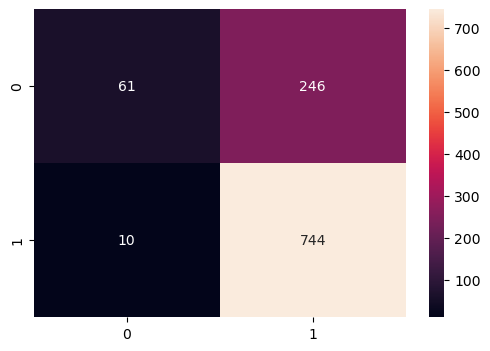

0.2 

Recall Score 0.97
precision_score 0.79
F1 Score 0.87 
Confusion Matrix


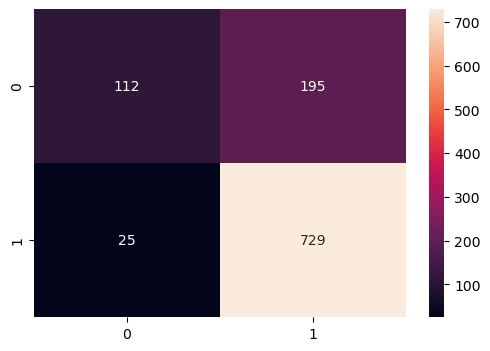

0.3 

Recall Score 0.95
precision_score 0.82
F1 Score 0.88 
Confusion Matrix


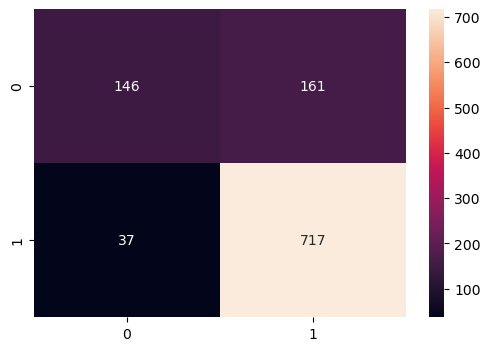

0.4 

Recall Score 0.94
precision_score 0.84
F1 Score 0.89 
Confusion Matrix


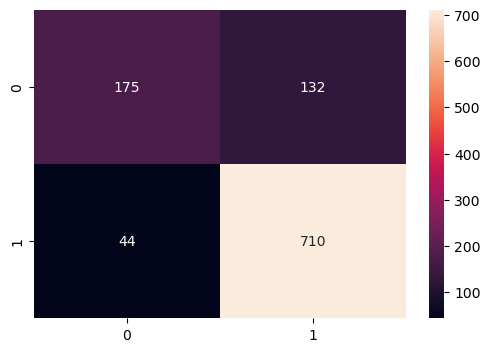

0.5 

Recall Score 0.91
precision_score 0.86
F1 Score 0.89 
Confusion Matrix


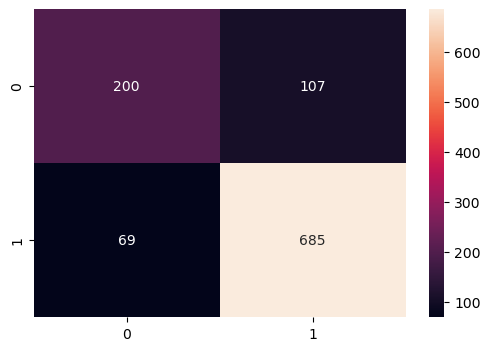

0.6 

Recall Score 0.87
precision_score 0.88
F1 Score 0.88 
Confusion Matrix


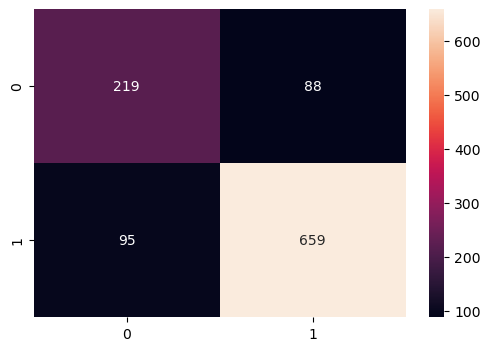

0.7 

Recall Score 0.84
precision_score 0.92
F1 Score 0.88 
Confusion Matrix


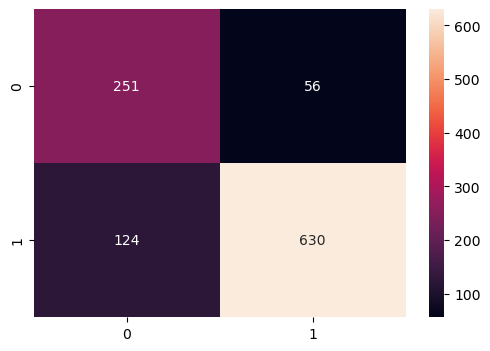

0.8 

Recall Score 0.75
precision_score 0.94
F1 Score 0.84 
Confusion Matrix


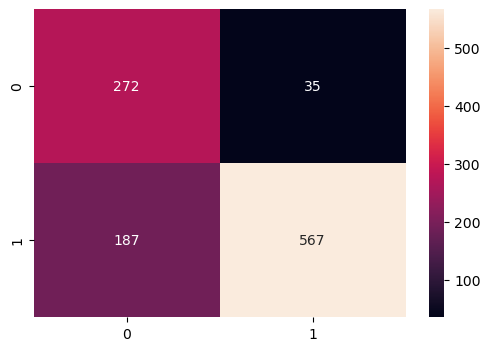

0.9 

Recall Score 0.6
precision_score 0.96
F1 Score 0.74 
Confusion Matrix


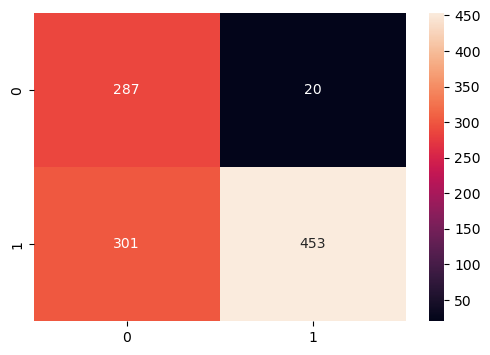

In [1266]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(train_labels)):#defining a loop for the length of the test data
        if np.array(ytrain_predict_prob[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Recall Score',round(metrics.recall_score(train_labels,custom_cutoff_data),2))
    print('precision_score',round(metrics.precision_score(train_labels,custom_cutoff_data),2))
    print('F1 Score',round(metrics.f1_score(train_labels,custom_cutoff_data),2),'\2')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(train_labels,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [1267]:
cut_off=0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Recall_Score_1= 0.99
Accuracy_Score_1= 0.75
F1_Score_1= 0.85  
Recall_score_2= 0.97
Accuracy_Score_2= 0.77
F1_Score_2=0.86
Recall_Score_3= 0.96
Accuracy_Score_3= 0.8
F1_Score_3= 0.87
Recall_Score_4= 0.94
Accuracy_Score_4= 0.83
F1_Score_4= 0.89
Recall_Score_5= 0.92
Accuracy_Score_5= 0.84
F1_Score_5= 0.89  
Recall_Score_6= 0.87
Accuracy_Score_6= 0.83
F1_Score_6= 0.88  
Recall_Score_7= 0.83
Accuracy_Score_7= 0.82
F1_Score_7= 0.87  
Recall_Score_8=0.73
Accuracy_Score_8=0.78
F1_Score_8=0.82  
Recall_Score_9=0.56
Accuracy_Score_9=0.67
F1_Score_9=0.7  
precision_score_1=0.74
precision_score_2= 0.77
precision_score_3=0.80
precision_score_4=0.83
precision_score_5=0.86
precision_score_6=0.89
precision_score_7=0.92
precision_score_8=0.95
precision_score_9=0.96

In [1268]:
index=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
data = pd.DataFrame({'Recall':[Recall_Score_1,Recall_score_2,Recall_Score_3,Recall_Score_4,Recall_Score_5,Recall_Score_6,Recall_Score_7,Recall_Score_8,Recall_Score_9],
       'precision':[precision_score_1,precision_score_2,precision_score_3,precision_score_4,precision_score_5,precision_score_6,precision_score_7,precision_score_8,precision_score_9],
        'Accuracy':[Accuracy_Score_1,Accuracy_Score_2,Accuracy_Score_3,Accuracy_Score_4,Accuracy_Score_5,Accuracy_Score_6,Accuracy_Score_7,Accuracy_Score_8,Accuracy_Score_9],
            'F1 Score':[F1_Score_1,F1_Score_2,F1_Score_3,F1_Score_4,F1_Score_5,F1_Score_6,F1_Score_7,F1_Score_8,F1_Score_9]},index=index)


In [1269]:
data

,Recall,precision,Accuracy,F1 Score
0.1,0.99,0.74,0.75,0.85
0.2,0.97,0.77,0.77,0.86
0.3,0.96,0.80,0.80,0.87
0.4,0.94,0.83,0.83,0.89
0.5,0.92,0.86,0.84,0.89
0.6,0.87,0.89,0.83,0.88
0.7,0.83,0.92,0.82,0.87
0.8,0.73,0.95,0.78,0.82
0.9,0.56,0.96,0.67,0.70


In [1270]:
#Predicting the classes on the train data
data_pred_custom_cutoff_train=[]
for i in range(0,len(probs_lda_train[:,1])):
    if np.array(probs_lda_train[:,1])[i]>=0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff_train.append(a)

In [1271]:
#Predicting the classes on the test data
data_pred_custom_cutoff_test=[]
for i in range(0,len(probs_lda_test[:,1])):
    if np.array(probs_lda_test[:,1])[i]>=0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff_test.append(a)

Text(0.5, 1.0, 'Train Data')

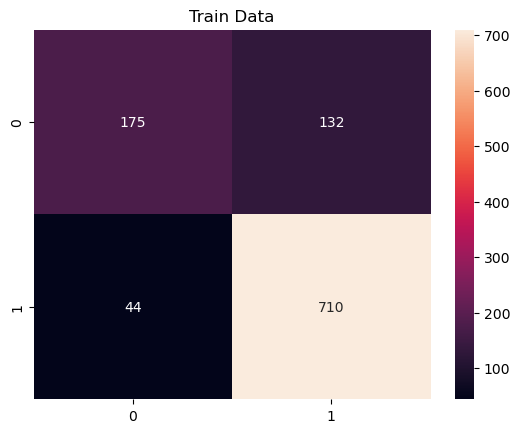

In [1272]:
plt.style.use('default')
sns.heatmap((metrics.confusion_matrix(train_labels,data_pred_custom_cutoff_train)),annot=True,fmt='.5g');
plt.title('Train Data')

In [1273]:
confusion_matrix(train_labels, data_pred_custom_cutoff_train)

array([[175, 132],
       [ 44, 710]], dtype=int64)

Text(0.5, 1.0, 'Test Data')

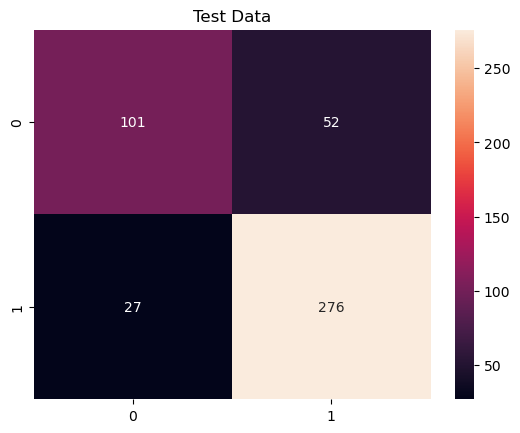

In [1274]:
plt.style.use('default')
sns.heatmap((metrics.confusion_matrix(test_labels,data_pred_custom_cutoff_test)),annot=True,fmt='.5g');
plt.title('Test Data')

In [1275]:
confusion_matrix(test_labels, data_pred_custom_cutoff_test)

array([[101,  52],
       [ 27, 276]], dtype=int64)

In [1276]:
print('Training Data report :\n\n',metrics.classification_report(train_labels,data_pred_custom_cutoff_train),'\n')
print('Testing Data report:\n\n',metrics.classification_report(test_labels,data_pred_custom_cutoff_test),'\n')

Training Data report :

               precision    recall  f1-score   support

           0       0.80      0.57      0.67       307
           1       0.84      0.94      0.89       754

    accuracy                           0.83      1061
   macro avg       0.82      0.76      0.78      1061
weighted avg       0.83      0.83      0.82      1061
 

Testing Data report:

               precision    recall  f1-score   support

           0       0.79      0.66      0.72       153
           1       0.84      0.91      0.87       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.82      0.83      0.82       456
 



In [1277]:
# Accuracy - Test Data
lda2_test_score=LDA_model.score(X_test, test_labels)
lda2_test_score

0.8333333333333334

In [1278]:
# Accuracy - Train Data
lda2_train_score=LDA_model.score(X_train, train_labels)
lda2_train_score

0.8341187558906692

### AUC and ROC for the train data

AUC: 0.756


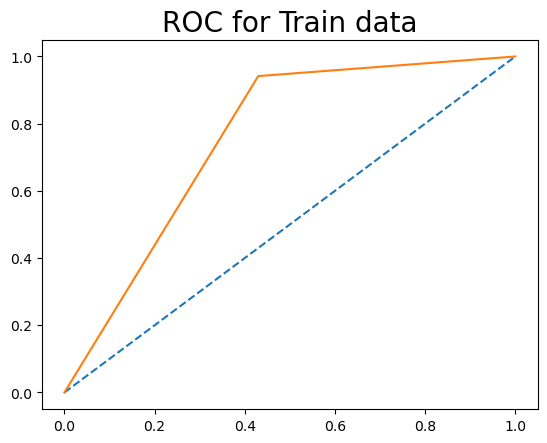

In [1279]:

# calculate AUC
lda2_train_auc = roc_auc_score(train_labels,data_pred_custom_cutoff_train)
print('AUC: %.3f' % lda2_train_auc)
# calculate roc curve
lda2_train_fpr, lda2_train_tpr, lda2_train_thresholds = roc_curve(train_labels,data_pred_custom_cutoff_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda2_train_fpr, lda2_train_tpr);
plt.style.use('fivethirtyeight')
plt.title('ROC for Train data')
plt.show()

AUC: 0.786


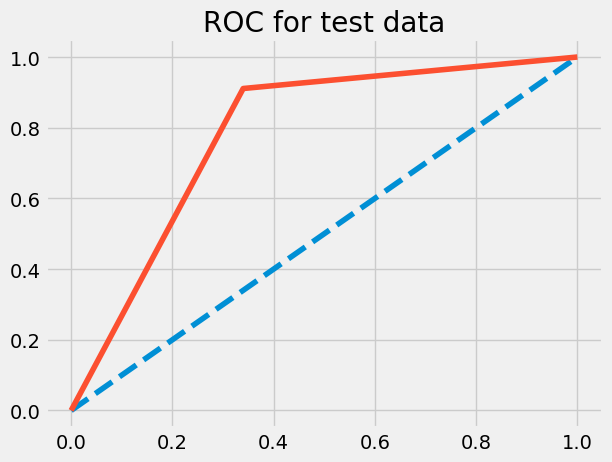

In [1280]:
lda2_test_auc = roc_auc_score(test_labels, data_pred_custom_cutoff_test)
print('AUC: %.3f' % lda2_test_auc)
# calculate roc curve
lda2_test_fpr, lda2_test_tpr, lda2_test_thresholds = roc_curve(test_labels, data_pred_custom_cutoff_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(lda2_test_fpr, lda2_test_tpr);
plt.style.use('fivethirtyeight')
plt.title('ROC for test data')
plt.show()

In [1281]:
lda2_metrics_C1=classification_report(test_labels,data_pred_custom_cutoff_test,output_dict=True)
lda2_df=pd.DataFrame(lda2_metrics_C1).transpose()
lda2_test_f1_C1=round(lda2_df.loc["1"][2],2)
lda2_test_recall_C1=round(lda2_df.loc["1"][1],2)
lda2_test_precision_C1=round(lda2_df.loc["1"][0],2)
print ('lda2_test_precision ',lda2_test_precision_C1)
print ('lda2_test_recall ',lda2_test_recall_C1)
print ('lda2_test_f1 ',lda2_test_f1_C1)

lda2_test_precision  0.84
lda2_test_recall  0.91
lda2_test_f1  0.87


In [1282]:
lda2_metrics_C0=classification_report(test_labels, data_pred_custom_cutoff_test,output_dict=True)
lda2_df=pd.DataFrame(lda2_metrics_C0).transpose()
lda2_test_f1_C0=round(lda2_df.loc["0"][2],2)
lda2_test_recall_C0=round(lda2_df.loc["0"][1],2)
lda2_test_precision_C0=round(lda2_df.loc["0"][0],2)
print ('lda2_test_precision ',lda2_test_precision_C0)
print ('lda2_test_recall ',lda2_test_recall_C0)
print ('lda2_test_f1 ',lda2_test_f1_C0)

lda2_test_precision  0.79
lda2_test_recall  0.66
lda2_test_f1  0.72


In [1283]:
lda2_metrics_C1=classification_report(train_labels, data_pred_custom_cutoff_train,output_dict=True)
lda2_df=pd.DataFrame(lda2_metrics_C1).transpose()
lda2_train_f1_C1=round(lda2_df.loc["1"][2],2)
lda2_train_recall_C1=round(lda2_df.loc["1"][1],2)
lda2_train_precision_C1=round(lda2_df.loc["1"][0],2)
print ('lda2_train_precision ',lda2_train_precision_C1)
print ('lda2_train_recall ',lda2_train_recall_C1)
print ('lda2_train_f1 ',lda2_train_f1_C1)

lda2_train_precision  0.84
lda2_train_recall  0.94
lda2_train_f1  0.89


In [1284]:
lda2_metrics_C0=classification_report(train_labels, data_pred_custom_cutoff_train,output_dict=True)
lda2_df=pd.DataFrame(lda2_metrics_C0).transpose()
lda2_train_f1_C0=round(lda2_df.loc["0"][2],2)
lda2_train_recall_C0=round(lda2_df.loc["0"][1],2)
lda2_train_precision_C0=round(lda2_df.loc["0"][0],2)
print ('lda2_train_precision ',lda2_train_precision_C0)
print ('lda2_train_recall ',lda2_train_recall_C0)
print ('lda2_train_f1 ',lda2_train_f1_C0)

lda2_train_precision  0.8
lda2_train_recall  0.57
lda2_train_f1  0.67


### KNeighborsClassifier

In [1285]:
df1=df.copy()
df1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [1286]:
# Copy all the predictor variables into X dataframe
X1 = df1.drop('vote', axis=1)

# Copy target into the y dataframe. 
y1 = df1['vote']

In [1287]:
from sklearn.preprocessing import MinMaxScaler

In [1288]:
X_1=MinMaxScaler()
X1 = pd.DataFrame(X_1.fit_transform(X1), columns=X1.columns)
X1.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0.0
1,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1.0
2,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1.0
3,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0.0
4,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1.0


In [1289]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split

X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X1, y1, test_size=0.30 , random_state=1)

In [1290]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train_k,y_train_k)

KNeighborsClassifier()

In [1291]:
## Predicting on Training and Test dataset

In [1292]:
ytrain_predict = KNN_model.predict(X_train_k)
ytest_predict = KNN_model.predict(X_test_k)

In [1293]:
## Getting the Predicted Classes and Probs

In [1294]:
ytrain_predict_prob=KNN_model.predict_proba(X_train_k)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,1.0,0.0
1,0.2,0.8
2,0.4,0.6
3,0.0,1.0
4,0.0,1.0


In [1295]:
ytest_predict_prob=KNN_model.predict_proba(X_test_k)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.8,0.2
4,0.0,1.0


In [1296]:
## Model Evaluation

In [1297]:
### AUC and ROC for the training data

AUC: 0.93


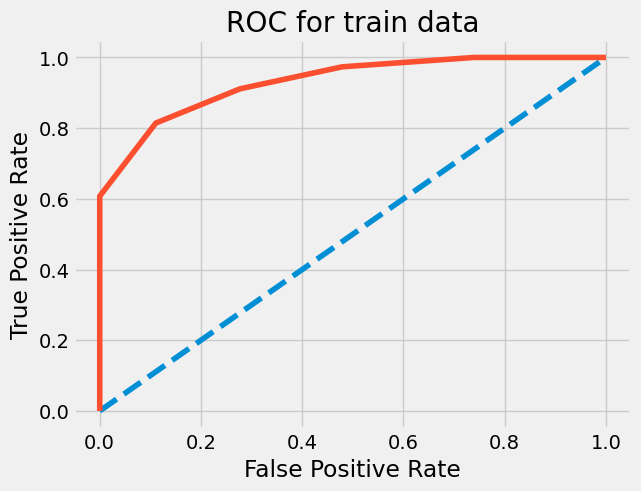

In [1298]:
# predict probabilities
probs = KNN_model.predict_proba(X_train_k)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(y_train_k, probs)
print('AUC: %.2f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train_k, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.style.use('fivethirtyeight')
plt.plot(knn_train_fpr, knn_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for train data')
plt.show()

In [1299]:
### AUC and ROC for the test data

AUC: 0.87


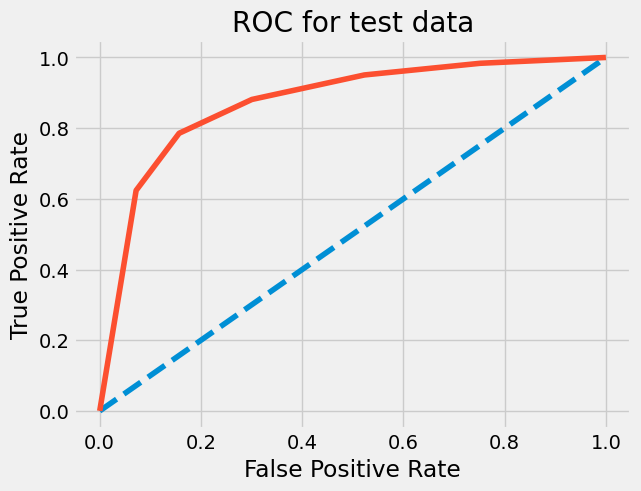

In [1300]:
# predict probabilities
probs = KNN_model.predict_proba(X_test_k)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(y_test_k, probs)
print('AUC: %.2f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_testthresholds = roc_curve(y_test_k, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr)
plt.style.use('fivethirtyeight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for test data')
plt.show()


In [1301]:
### Confusion Matrix for the training data

In [1302]:
metrics.confusion_matrix(y_train_k, ytrain_predict)

array([[222,  85],
       [ 67, 687]], dtype=int64)

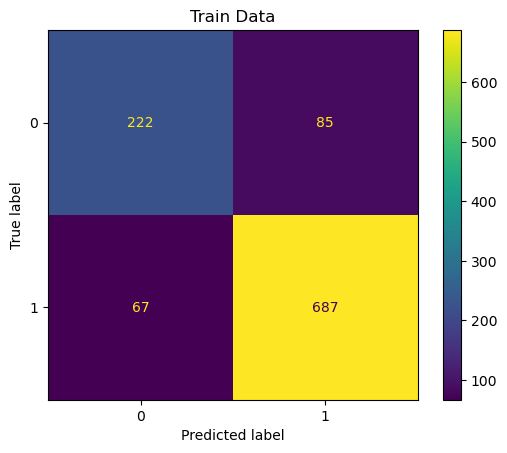

In [1303]:
plt.style.use('default')
metrics.plot_confusion_matrix(KNN_model,X_train_k,y_train_k);
plt.title('Train Data')
plt.show()

In [1304]:
#Train Data Accuracy
knn_train_acc=KNN_model.score(X_train_k,y_train_k) 
print('AUC: %.2f' % knn_train_acc)

AUC: 0.86


In [1305]:
print(classification_report(y_train_k, ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       307
           1       0.89      0.91      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.85      0.86      0.86      1061



knn_train_acc on train data

In [1306]:
knn_metrics_C1=classification_report(y_train_k, ytrain_predict,output_dict=True)
knn_metrics_train=pd.DataFrame(knn_metrics_C1).transpose()
knn_train_f1_C1=round(knn_metrics_train.loc["1"][2],2)
knn_train_recall_C1=round(knn_metrics_train.loc["1"][1],2)
knn_train_precision_C1=round(knn_metrics_train.loc["1"][0],2)
print ('knn_train_precision ',knn_train_precision_C1)
print ('knn_train_recall ',knn_train_recall_C1)
print ('knn_train_f1 ',knn_train_f1_C1)

knn_train_precision  0.89
knn_train_recall  0.91
knn_train_f1  0.9


In [1307]:
knn_metrics_C0=classification_report(y_train_k, ytrain_predict,output_dict=True)
knn_metrics_train=pd.DataFrame(knn_metrics_C0).transpose()
knn_train_f1_C0=round(knn_metrics_train.loc["0"][2],2)
knn_train_recall_C0=round(knn_metrics_train.loc["0"][1],2)
knn_train_precision_C0=round(knn_metrics_train.loc["0"][0],2)
print ('knn_train_precision ',knn_train_precision_C0)
print ('knn_train_recall ',knn_train_recall_C0)
print ('knn_train_f1 ',knn_train_f1_C0)

knn_train_precision  0.77
knn_train_recall  0.72
knn_train_f1  0.74


In [1308]:
### Confusion Matrix for test data

Text(0.5, 1.0, 'Test Data')

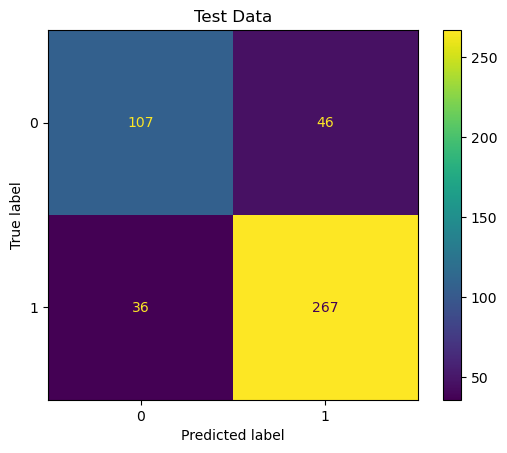

In [1309]:
metrics.plot_confusion_matrix(KNN_model,X_test_k,y_test_k);
plt.style.use('default')
plt.title('Test Data')

In [1310]:
#Test Data Accuracy
knn_test_acc=KNN_model.score(X_test_k,y_test_k)
print('AUC: %.2f' % knn_test_acc)

AUC: 0.82


In [1311]:
print(classification_report(y_test_k, ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       153
           1       0.85      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



KNN_metrics on test data

In [1312]:
knn_metrics_C1=classification_report(y_test_k, ytest_predict,output_dict=True)
knn_metrics_test=pd.DataFrame(knn_metrics_C1).transpose()
knn_test_f1_C1=round(knn_metrics_test.loc["1"][2],2)
knn_test_recall_C1=round(knn_metrics_test.loc["1"][1],2)
knn_test_precision_C1=round(knn_metrics_test.loc["1"][0],2)
print ('knn_test_precision ',knn_test_precision_C1)
print ('knn_test_recall ',knn_test_recall_C1)
print ('knn_test_f1 ',knn_test_f1_C1)

knn_test_precision  0.85
knn_test_recall  0.88
knn_test_f1  0.87


In [1313]:
knn_metrics_C0=classification_report(y_test_k, ytest_predict,output_dict=True)
knn_metrics_test=pd.DataFrame(knn_metrics_C0).transpose()
knn_test_f1_C0=round(knn_metrics_test.loc["0"][2],2)
knn_test_recall_C0=round(knn_metrics_test.loc["0"][1],2)
knn_test_precision_C0=round(knn_metrics_test.loc["0"][0],2)
print ('knn_test_precision ',knn_test_precision_C0)
print ('knn_test_recall ',knn_test_recall_C0)
print ('knn_test_f1 ',knn_test_f1_C0)

knn_test_precision  0.75
knn_test_recall  0.7
knn_test_f1  0.72


### Tuned KNN Model

**Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error**

Hint: Misclassification error **(MCE) = 1 - Test accuracy score.** Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [1314]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_k, y_train_k)
    # evaluate test accuracy
    scores = knn.score(X_test_k, y_test_k)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.24342105263157898,
 0.20175438596491224,
 0.17982456140350878,
 0.1600877192982456,
 0.1578947368421053,
 0.16666666666666663,
 0.16228070175438591,
 0.1578947368421053,
 0.16228070175438591,
 0.16447368421052633]

**Plot misclassification error vs k (with k value on X-axis) using matplotli**

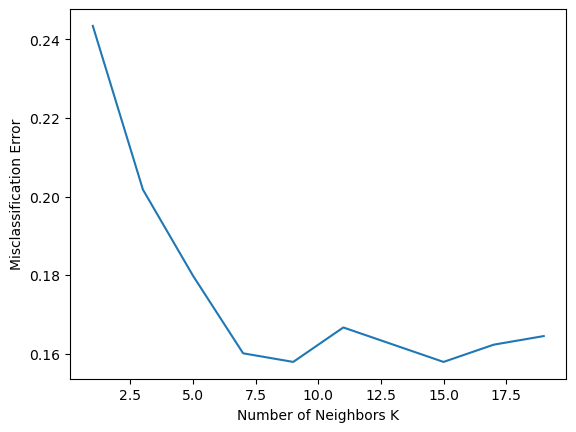

In [1315]:
import matplotlib.pyplot as plt
plt.style.use('default')
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [1316]:
from sklearn.neighbors import KNeighborsClassifier

KNNT_model=KNeighborsClassifier(n_neighbors=15)
KNNT_model.fit(X_train_k,y_train_k)

KNeighborsClassifier(n_neighbors=15)

In [1317]:
y_train_predict=KNNT_model.predict(X_train_k)
y_test_predict=KNNT_model.predict(X_test_k)

In [1318]:
## Performance Matrix on train data set
y_train_predict = KNNT_model.predict(X_train_k)
model_score = KNNT_model.score(X_train_k, y_train_k)
print(model_score)
print(metrics.confusion_matrix(y_train_k, y_train_predict),'\n')
print('Training Data report:\n\n',metrics.classification_report(y_train_k,y_train_predict),'\n')

0.8378887841658812
[[200 107]
 [ 65 689]] 

Training Data report:

               precision    recall  f1-score   support

           0       0.75      0.65      0.70       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061
 



In [1319]:
## Performance Matrix on test data set
y_test_predict = KNNT_model.predict(X_test_k)
model_score = KNNT_model.score(X_test_k, y_test_k)
print(model_score)
print(metrics.confusion_matrix(y_test_k, y_test_predict),'\n')
print('Testing Data report:\n\n',metrics.classification_report(y_test_k,y_test_predict),'\n')

0.8421052631578947
[[106  47]
 [ 25 278]] 

Testing Data report:

               precision    recall  f1-score   support

           0       0.81      0.69      0.75       153
           1       0.86      0.92      0.89       303

    accuracy                           0.84       456
   macro avg       0.83      0.81      0.82       456
weighted avg       0.84      0.84      0.84       456
 



Text(0.5, 1.0, 'Train Data')

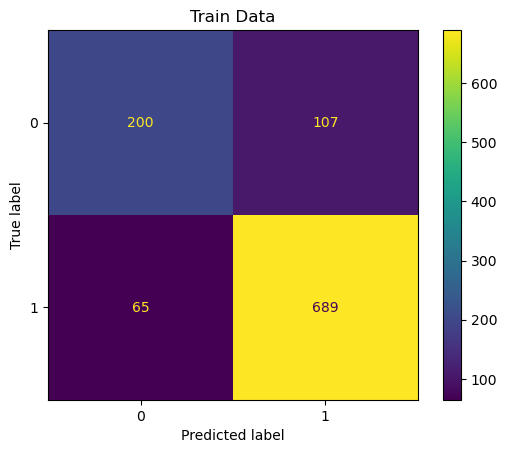

In [1320]:
metrics.plot_confusion_matrix(KNNT_model,X_train_k,y_train_k);
plt.style.use('default')
plt.title('Train Data')

Text(0.5, 1.0, 'Test Data')

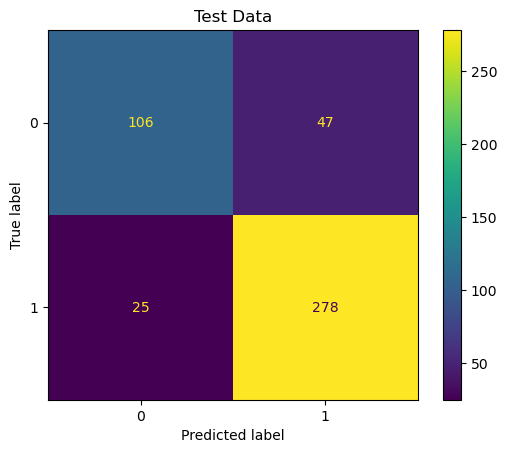

In [1321]:
metrics.plot_confusion_matrix(KNNT_model,X_test_k,y_test_k);
plt.style.use('default')
plt.title('Test Data')

AUC: 0.90


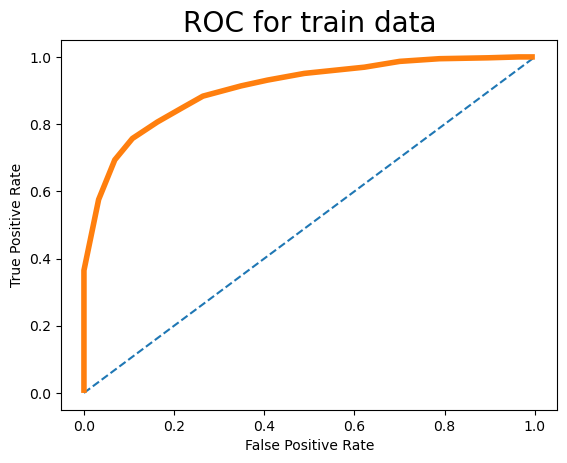

In [1322]:
# predict probabilities
probs = KNNT_model.predict_proba(X_train_k)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knnt_train_auc = roc_auc_score(y_train_k, probs)
print('AUC: %.2f' % knnt_train_auc)
# calculate roc curve
knnt_train_fpr, knnt_train_tpr, knnt_train_thresholds = roc_curve(y_train_k, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.style.use('fivethirtyeight')
plt.plot(knnt_train_fpr, knnt_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for train data')
plt.show()

In [1323]:
### AUC and ROC for the test data

AUC: 0.89


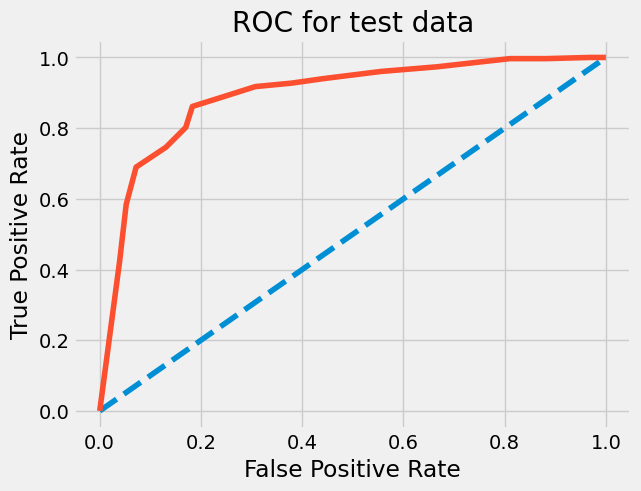

In [1324]:
# predict probabilities
probs = KNNT_model.predict_proba(X_test_k)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knnt_test_auc = roc_auc_score(y_test_k, probs)
print('AUC: %.2f' % knnt_test_auc)
# calculate roc curve
knnt_test_fpr, knnt_test_tpr, knnt_testthresholds = roc_curve(y_test_k, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knnt_test_fpr, knnt_test_tpr)
plt.style.use('fivethirtyeight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for test data')
plt.show()


In [1325]:
#Train Data Accuracy
knnt_train_acc=KNNT_model.score(X_train_k,y_train_k) 
print('AUC: %.2f' % knnt_train_acc)

AUC: 0.84


knnt_train_acc on train data

In [1326]:
knnt_metrics_C1=classification_report(y_train_k, y_train_predict,output_dict=True)
knnt_metrics_train=pd.DataFrame(knnt_metrics_C1).transpose()
knnt_train_f1_C1=round(knnt_metrics_train.loc["1"][2],2)
knnt_train_recall_C1=round(knnt_metrics_train.loc["1"][1],2)
knnt_train_precision_C1=round(knnt_metrics_train.loc["1"][0],2)
print ('knnt_train_precision ',knnt_train_precision_C1)
print ('knnt_train_recall ',knnt_train_recall_C1)
print ('knnt_train_f1 ',knnt_train_f1_C1)

knnt_train_precision  0.87
knnt_train_recall  0.91
knnt_train_f1  0.89


In [1327]:
knnt_metrics_C0=classification_report(y_train_k, y_train_predict,output_dict=True)
knnt_metrics_train=pd.DataFrame(knnt_metrics_C0).transpose()
knnt_train_f1_C0=round(knnt_metrics_train.loc["0"][2],2)
knnt_train_recall_C0=round(knnt_metrics_train.loc["0"][1],2)
knnt_train_precision_C0=round(knnt_metrics_train.loc["0"][0],2)
print ('knnt_train_precision ',knnt_train_precision_C0)
print ('knnt_train_recall ',knnt_train_recall_C0)
print ('knnt_train_f1 ',knnt_train_f1_C0)

knnt_train_precision  0.75
knnt_train_recall  0.65
knnt_train_f1  0.7


In [1328]:
#Test Data Accuracy
knnt_test_acc=KNNT_model.score(X_test_k,y_test_k)
print('AUC: %.2f' % knnt_test_acc)

AUC: 0.84


KNNT_metrics on test data

In [1329]:
knnt_metrics_C1=classification_report(y_test_k, y_test_predict,output_dict=True)
knnt_metrics_test=pd.DataFrame(knnt_metrics_C1).transpose()
knnt_test_f1_C1=round(knnt_metrics_test.loc["1"][2],2)
knnt_test_recall_C1=round(knnt_metrics_test.loc["1"][1],2)
knnt_test_precision_C1=round(knnt_metrics_test.loc["1"][0],2)
print ('knnt_test_precision ',knnt_test_precision_C1)
print ('knnt_test_recall ',knnt_test_recall_C1)
print ('knnt_test_f1 ',knnt_test_f1_C1)

knnt_test_precision  0.86
knnt_test_recall  0.92
knnt_test_f1  0.89


In [1330]:
knnt_metrics_C0=classification_report(y_test_k, y_test_predict,output_dict=True)
knnt_metrics_test=pd.DataFrame(knnt_metrics_C0).transpose()
knnt_test_f1_C0=round(knnt_metrics_test.loc["0"][2],2)
knnt_test_recall_C0=round(knnt_metrics_test.loc["0"][1],2)
knnt_test_precision_C0=round(knnt_metrics_test.loc["0"][0],2)
print ('knnt_test_precision ',knnt_test_precision_C0)
print ('knnt_test_recall ',knnt_test_recall_C0)
print ('knnt_test_f1 ',knnt_test_f1_C0)

knnt_test_precision  0.81
knnt_test_recall  0.69
knnt_test_f1  0.75


### Naive Bayes Model

In [1331]:
from sklearn.naive_bayes import GaussianNB

In [1332]:
Nb_model = GaussianNB()
Nb_model.fit(X_train, train_labels)

GaussianNB()

In [1333]:
ytrain_predict = Nb_model.predict(X_train)
ytest_predict = Nb_model.predict(X_test)


## Getting the Predicted Classes and Probs

In [1334]:
ytrain_predict_prob=Nb_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.984678,0.015322
1,0.065437,0.934563
2,0.271735,0.728265
3,0.080026,0.919974
4,0.007648,0.992352


In [1335]:
ytest_predict_prob=Nb_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.536792,0.463208
1,0.120285,0.879715
2,0.000332,0.999668
3,0.945240,0.054760
4,0.039267,0.960733


## Model Evaluation

### AUC and ROC for the training data

AUC: 0.89


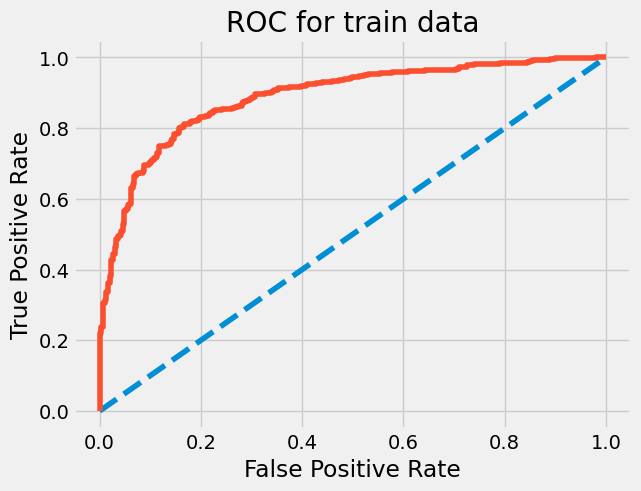

In [1336]:
# predict probabilities
probs = Nb_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Nb_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.2f' % Nb_train_auc)
# calculate roc curve
Nb_train_fpr, Nb_train_tpr, Nb_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Nb_train_fpr, Nb_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for train data')
plt.show()

### AUC and ROC for the test data

AUC: 0.88


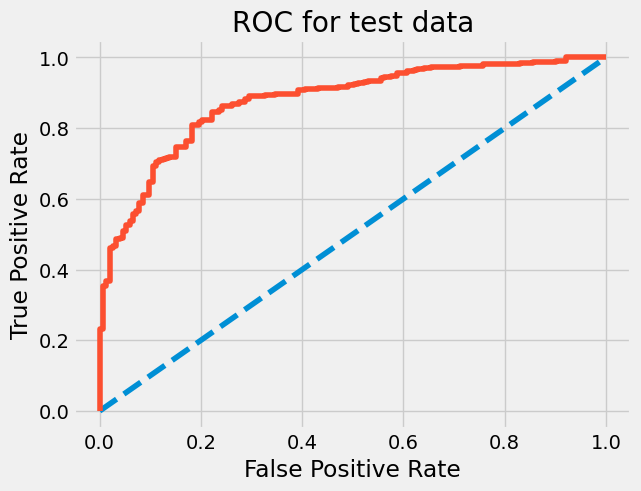

In [1337]:
# predict probabilities
probs = Nb_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Nb_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.2f' % Nb_test_auc)
# calculate roc curve
Nb_test_fpr, Nb_test_tpr, Nb_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Nb_test_fpr, Nb_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for test data')
plt.show()


### Confusion Matrix for the training data

In [1338]:
metrics.confusion_matrix(train_labels, ytrain_predict)

array([[211,  96],
       [ 79, 675]], dtype=int64)

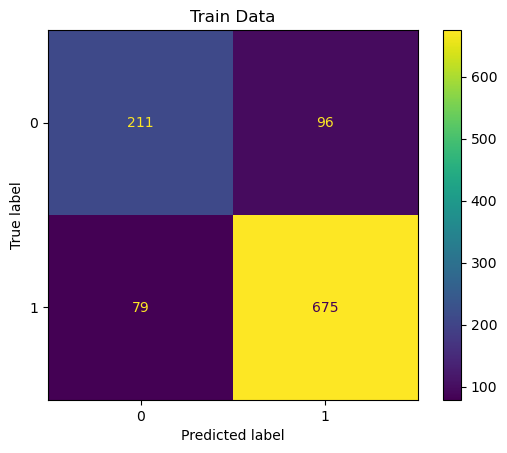

In [1339]:
plt.style.use('default')
metrics.plot_confusion_matrix(Nb_model,X_train,train_labels);
plt.title('Train Data')
plt.show()

In [1340]:
#Train Data Accuracy
Nb_train_acc=Nb_model.score(X_train,train_labels) 
print('AUC: %.2f' % Nb_train_acc)

AUC: 0.84


In [1341]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



Nb_metrics on train data

In [1342]:
Nb_metrics_C1=classification_report(train_labels, ytrain_predict,output_dict=True)
Nb_metrics_train=pd.DataFrame(Nb_metrics_C1).transpose()
Nb_train_f1_C1=round(Nb_metrics_train.loc["1"][2],2)
Nb_train_recall_C1=round(Nb_metrics_train.loc["1"][1],3)
Nb_train_precision_C1=round(Nb_metrics_train.loc["1"][0],2)
print ('Nb_train_precision ',Nb_train_precision_C1)
print ('Nb_train_recall ',Nb_train_recall_C1)
print ('Nb_train_f1 ',Nb_train_f1_C1)

Nb_train_precision  0.88
Nb_train_recall  0.895
Nb_train_f1  0.89


In [1343]:
Nb_metrics_C0=classification_report(train_labels, ytrain_predict,output_dict=True)
Nb_metrics_train=pd.DataFrame(Nb_metrics_C0).transpose()
Nb_train_f1_C0=round(Nb_metrics_train.loc["0"][2],2)
Nb_train_recall_C0=round(Nb_metrics_train.loc["0"][1],3)
Nb_train_precision_C0=round(Nb_metrics_train.loc["0"][0],2)
print ('Nb_train_precision ',Nb_train_precision_C0)
print ('Nb_train_recall ',Nb_train_recall_C0)
print ('Nb_train_f1 ',Nb_train_f1_C0)

Nb_train_precision  0.73
Nb_train_recall  0.687
Nb_train_f1  0.71


### Confusion Matrix for test data

Text(0.5, 1.0, 'Test Data')

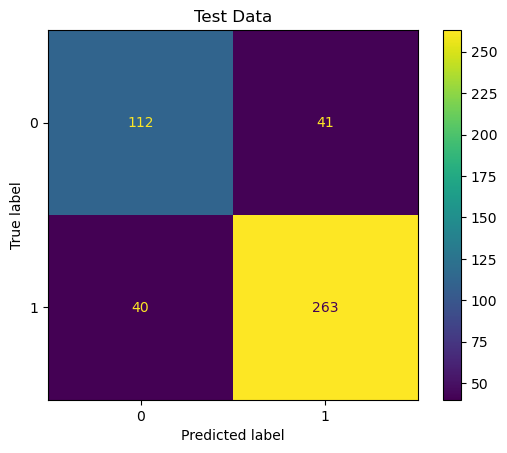

In [1344]:
metrics.plot_confusion_matrix(Nb_model,X_test,test_labels);
plt.style.use('default')
plt.title('Test Data')

In [1345]:
#Test Data Accuracy
Nb_test_acc=Nb_model.score(X_test,test_labels)
print('AUC: %.2f' % Nb_test_acc)

AUC: 0.82


In [1346]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



Nb_metrics on test data

In [1347]:
Nb_metrics_C1=classification_report(test_labels, ytest_predict,output_dict=True)
Nb_metrics_test=pd.DataFrame(Nb_metrics_C1).transpose()
Nb_test_f1_C1=round(Nb_metrics_test.loc["1"][2],2)
Nb_test_recall_C1=round(Nb_metrics_test.loc["1"][1],2)
Nb_test_precision_C1=round(Nb_metrics_test.loc["1"][0],2)
print ('Nb_test_precision ',Nb_test_precision_C1)
print ('Nb_test_recall ',Nb_test_recall_C1)
print ('Nb_test_f1 ',Nb_test_f1_C1)

Nb_test_precision  0.87
Nb_test_recall  0.87
Nb_test_f1  0.87


In [1348]:
Nb_metrics_C0=classification_report(test_labels, ytest_predict,output_dict=True)
Nb_metrics_test=pd.DataFrame(Nb_metrics_C0).transpose()
Nb_test_f1_C0=round(Nb_metrics_test.loc["0"][2],2)
Nb_test_recall_C0=round(Nb_metrics_test.loc["0"][1],2)
Nb_test_precision_C0=round(Nb_metrics_test.loc["0"][0],2)
print ('Nb_test_precision ',Nb_test_precision_C0)
print ('Nb_test_recall ',Nb_test_recall_C0)
print ('Nb_test_f1 ',Nb_test_f1_C0)

Nb_test_precision  0.74
Nb_test_recall  0.73
Nb_test_f1  0.73


### Naive Bayes Model - SMOTE

In [1349]:
from imblearn.over_sampling import SMOTE

**SMOTE is only applied on the train data set**

In [1350]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, train_labels.ravel())

In [1351]:
## Let's check the shape after SMOTE
X_train_res.shape

(1508, 8)

### Naive Bayes Model SMOTE

In [1352]:
from sklearn.naive_bayes import GaussianNB

In [1353]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [1354]:
ytrain_predict = NB_SM_model.predict(X_train_res)
ytest_predict = NB_SM_model.predict(X_test)


## Model Evaluation

### AUC and ROC for the training data

AUC: 0.91


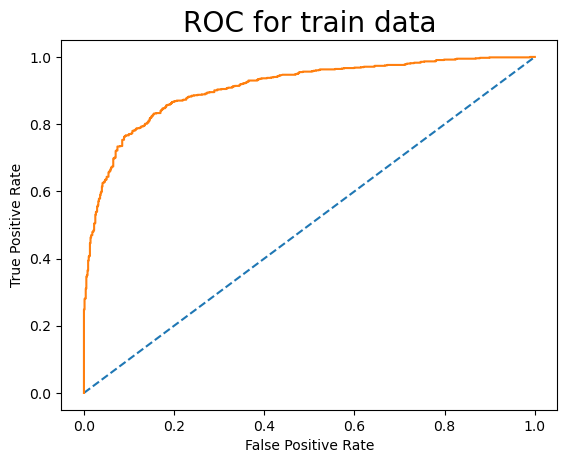

In [1355]:
# predict probabilities
probs = NB_SM_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Nbs_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.2f' % Nbs_train_auc)
# calculate roc curve
Nbs_train_fpr, Nbs_train_tpr, Nbs_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Nbs_train_fpr, Nbs_train_tpr)
plt.style.use('fivethirtyeight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for train data')
plt.show()

### AUC and ROC for the test data

AUC: 0.86


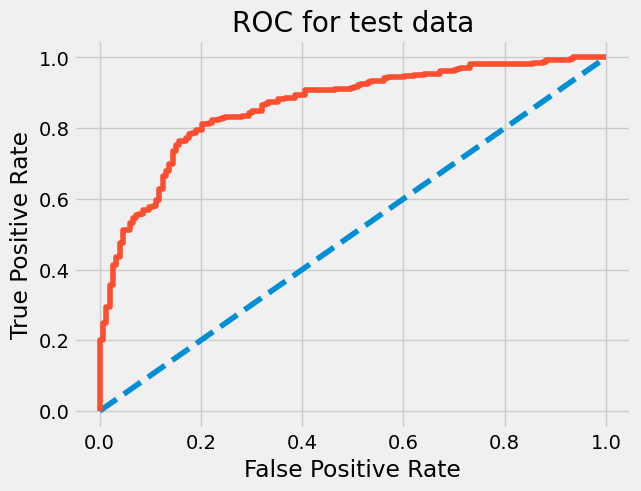

In [1356]:
# predict probabilities
probs = NB_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Nbs_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.2f' % Nbs_test_auc)
# calculate roc curve
Nbs_test_fpr, Nbs_test_tpr, Nbs_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.style.use('fivethirtyeight')
plt.plot(Nbs_test_fpr, Nbs_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for test data')
plt.show()


### Confusion Matrix for the training data

In [1357]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict),'\n')
print('Training Data report:\n\n',metrics.classification_report(y_train_res,y_train_predict),'\n')

0.8328912466843501
[[628 126]
 [126 628]] 

Training Data report:

               precision    recall  f1-score   support

           0       0.83      0.83      0.83       754
           1       0.83      0.83      0.83       754

    accuracy                           0.83      1508
   macro avg       0.83      0.83      0.83      1508
weighted avg       0.83      0.83      0.83      1508
 



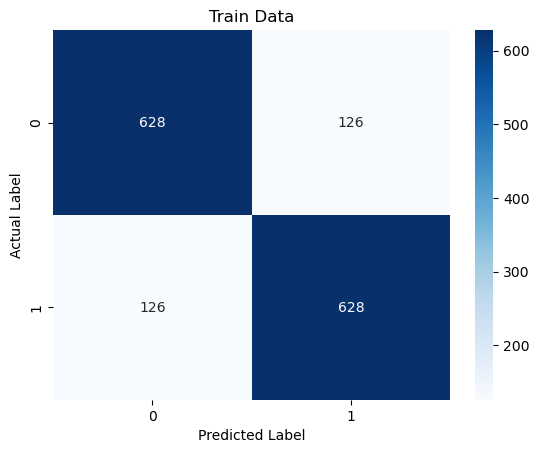

In [1358]:
# Get the confusion matrix on the train data
plt.style.use('default')
sns.heatmap((metrics.confusion_matrix(y_train_res,NB_SM_model.predict(X_train_res))),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Train Data')
plt.show()

In [1359]:
#Train Data Accuracy
Nbs_train_acc=NB_SM_model.score(X_train_res,y_train_res) 
print('AUC: %.2f' % Nbs_train_acc)

AUC: 0.83


Nbs_metrics on train data

In [1360]:
nbs_metrics_C1=classification_report(y_train_res,y_train_predict,output_dict=True)
nbs_metrics_train=pd.DataFrame(nbs_metrics_C1).transpose()
nbs_train_f1_C1=round(nbs_metrics_train.loc["1"][2],2)
nbs_train_recall_C1=round(nbs_metrics_train.loc["1"][1],2)
nbs_train_precision_C1=round(nbs_metrics_train.loc["1"][0],2)
print ('nbs_train_precision ',nbs_train_precision_C1)
print ('nbs_train_recall ',nbs_train_recall_C1)
print ('nbs_train_f1 ',nbs_train_f1_C1)

nbs_train_precision  0.83
nbs_train_recall  0.83
nbs_train_f1  0.83


In [1361]:
nbs_metrics_C0=classification_report(y_train_res,y_train_predict,output_dict=True)
nbs_metrics_train=pd.DataFrame(nbs_metrics_C0).transpose()
nbs_train_f1_C0=round(nbs_metrics_train.loc["0"][2],2)
nbs_train_recall_C0=round(nbs_metrics_train.loc["0"][1],2)
nbs_train_precision_C0=round(nbs_metrics_train.loc["0"][0],2)
print ('nbs_train_precision ',nbs_train_precision_C0)
print ('nbs_train_recall ',nbs_train_recall_C0)
print ('nbs_train_f1 ',nbs_train_f1_C0)

nbs_train_precision  0.83
nbs_train_recall  0.83
nbs_train_f1  0.83


### Confusion Matrix for test data

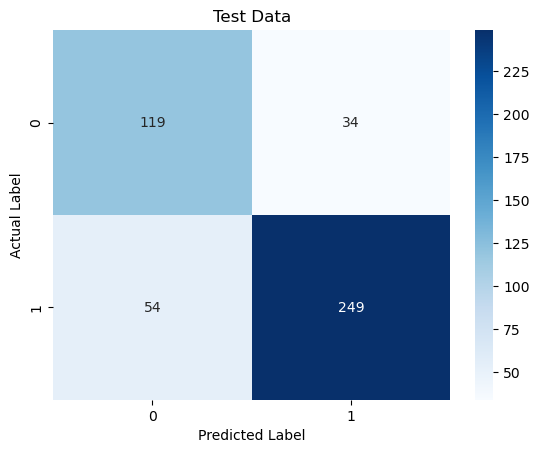

In [1362]:
# Get the confusion matrix on the test data
plt.style.use('default')
sns.heatmap((metrics.confusion_matrix(test_labels,NB_SM_model.predict(X_test))),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Test Data')
plt.show()

In [1363]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, test_labels)
print(model_score)
print(metrics.confusion_matrix(test_labels, y_test_predict),'\n')
print('Testing Data report:\n\n',metrics.classification_report(test_labels,y_test_predict),'\n')

0.8070175438596491
[[119  34]
 [ 54 249]] 

Testing Data report:

               precision    recall  f1-score   support

           0       0.69      0.78      0.73       153
           1       0.88      0.82      0.85       303

    accuracy                           0.81       456
   macro avg       0.78      0.80      0.79       456
weighted avg       0.82      0.81      0.81       456
 



In [1364]:
#Test Data Accuracy
Nbs_test_acc=NB_SM_model.score(X_test, test_labels)
print('AUC: %.2f' % Nbs_test_acc)

AUC: 0.81


Nbs_metrics on test data

In [1365]:
nbs_metrics_C1=classification_report(test_labels,y_test_predict,output_dict=True)
nbs_metrics_test=pd.DataFrame(nbs_metrics_C1).transpose()
nbs_test_f1_C1=round(nbs_metrics_test.loc["1"][2],2)
nbs_test_recall_C1=round(nbs_metrics_test.loc["1"][1],2)
nbs_test_precision_C1=round(nbs_metrics_test.loc["1"][0],2)
print ('nbs_test_precision ',nbs_test_precision_C1)
print ('nbs_test_recall ',nbs_test_recall_C1)
print ('nbs_test_f1 ',nbs_test_f1_C1)
print('\n')
nbs_metrics_C0=classification_report(test_labels,y_test_predict,output_dict=True)
nbs_metrics_test=pd.DataFrame(nbs_metrics_C0).transpose()
nbs_test_f1_C0=round(nbs_metrics_test.loc["0"][2],2)
nbs_test_recall_C0=round(nbs_metrics_test.loc["0"][1],2)
nbs_test_precision_C0=round(nbs_metrics_test.loc["0"][0],2)
print ('nbs_test_precision ',nbs_test_precision_C0)
print ('nbs_test_recall ',nbs_test_recall_C0)
print ('nbs_test_f1 ',nbs_test_f1_C0)

nbs_test_precision  0.88
nbs_test_recall  0.82
nbs_test_f1  0.85


nbs_test_precision  0.69
nbs_test_recall  0.78
nbs_test_f1  0.73


### Bagging Random Forest

In [1366]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(max_depth=4, max_features=5, min_samples_leaf=25,
                       min_samples_split=50, n_estimators=101)
RF_model.fit(X_train, train_labels)

RandomForestClassifier(max_depth=4, max_features=5, min_samples_leaf=25,
                       min_samples_split=50, n_estimators=101)

In [1367]:
from sklearn.ensemble import BaggingClassifier

Bagging_model=BaggingClassifier(base_estimator= RF_model,n_estimators=101,random_state=1)
Bagging_model.fit(X_train, train_labels)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=4,
                                                        max_features=5,
                                                        min_samples_leaf=25,
                                                        min_samples_split=50,
                                                        n_estimators=101),
                  n_estimators=101, random_state=1)

In [1368]:
#train Data Accuracy
Bagging_train_acc=Bagging_model.score(X_train, train_labels)
print('AUC: %.2f' % Bagging_train_acc)

AUC: 0.84


In [1369]:
#Test Data Accuracy
Bagging_test_acc=Bagging_model.score(X_test, test_labels)
print('AUC: %.2f' % Bagging_test_acc)

AUC: 0.82


In [1370]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, train_labels)
print(model_score)
print(metrics.confusion_matrix(train_labels, y_train_predict),'\n')
print('Training Data report:\n\n',metrics.classification_report(train_labels,y_train_predict),'\n')

0.8360037700282752
[[187 120]
 [ 54 700]] 

Training Data report:

               precision    recall  f1-score   support

           0       0.78      0.61      0.68       307
           1       0.85      0.93      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061
 



In [1371]:
Bagging_train_precision_C1=0.85
Bagging_train_recall_C1=0.93
Bagging_train_f1_C1=0.89

In [1372]:
Bagging_train_precision_C0=0.78
Bagging_train_recall_C0=0.61
Bagging_train_f1_C0=0.68

In [1373]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score =Bagging_model.score(X_test, test_labels)
print(model_score)
print(metrics.confusion_matrix(test_labels, y_test_predict),'\n')
print('Testing Data report:\n\n',metrics.classification_report(test_labels,y_test_predict),'\n')

0.8223684210526315
[[ 92  61]
 [ 20 283]] 

Testing Data report:

               precision    recall  f1-score   support

           0       0.82      0.60      0.69       153
           1       0.82      0.93      0.87       303

    accuracy                           0.82       456
   macro avg       0.82      0.77      0.78       456
weighted avg       0.82      0.82      0.81       456
 



In [1374]:
Bagging_test_precision_C1=0.82
Bagging_test_recall_C1=0.93
Bagging_test_f1_C1=0.87

In [1375]:
Bagging_test_precision_C0=0.82
Bagging_test_recall_C0=0.60
Bagging_test_f1_C0=0.69

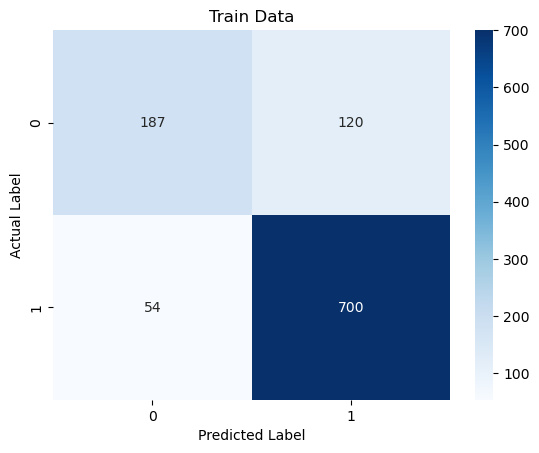

In [1376]:
# Get the confusion matrix on the train data
plt.style.use('default')
sns.heatmap((metrics.confusion_matrix(train_labels,Bagging_model.predict(X_train))),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Train Data')
plt.show()

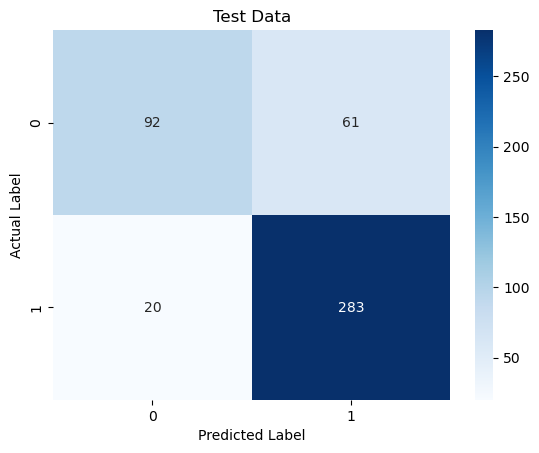

In [1377]:
# Get the confusion matrix on the train data
plt.style.use('default')
sns.heatmap((metrics.confusion_matrix(test_labels,Bagging_model.predict(X_test))),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Test Data')
plt.show()

AUC: 0.90


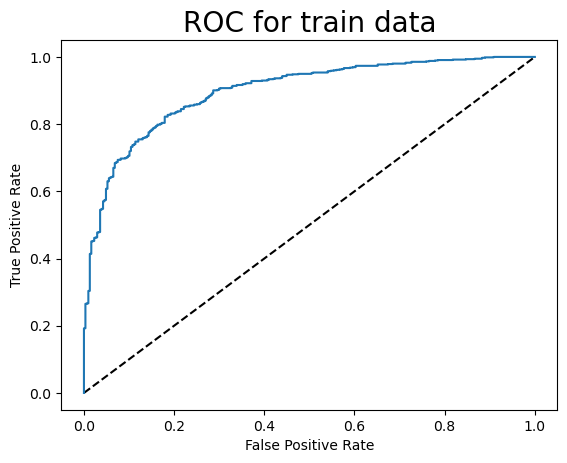

In [1378]:

# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Bagging_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.2f' % Bagging_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.style.use('fivethirtyeight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for train data')
plt.show()


AUC: 0.88


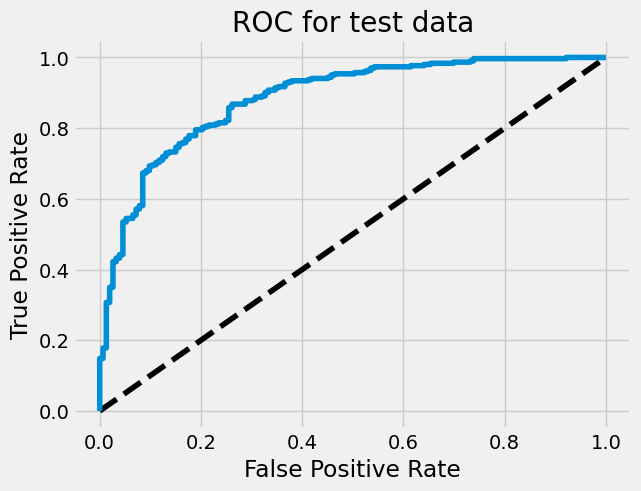

In [1379]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Bagging_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.2f' % Bagging_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot the roc curve for the model
plt.style.use('fivethirtyeight')
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for test data')
plt.show()


In [1380]:
Feature_Importance=pd.DataFrame(RF_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)
Feature_Importance

,Imp
Hague,0.366539
Blair,0.248619
Europe,0.217466
economic.cond.national,0.062175
political.knowledge,0.055049
age,0.034460
economic.cond.household,0.012606
gender,0.003086


### Boosting - Ada Boosting

In [1381]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,train_labels)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [1382]:
#Train Data Accuracy
Ada_train_acc=ADB_model.score(X_train, train_labels)
print('AUC: %.2f' % Ada_train_acc)

AUC: 0.85


In [1383]:
#Test Data Accuracy
Ada_test_acc=ADB_model.score(X_test, test_labels)
print('AUC: %.2f' % Ada_test_acc)

AUC: 0.81


In [1384]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score =ADB_model.score(X_train, train_labels)
print(model_score)
print(metrics.confusion_matrix(train_labels, y_train_predict),'\n')
print('Training Data report:\n\n',metrics.classification_report(train_labels,y_train_predict),'\n')

0.8501413760603205
[[214  93]
 [ 66 688]] 

Training Data report:

               precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061
 



In [1385]:
Ada_metrics_C1=metrics.classification_report(train_labels,y_train_predict,output_dict=True)
Ada_metrics_train=pd.DataFrame(Ada_metrics_C1).transpose()
Ada_train_f1_C1=round(Ada_metrics_train.loc["1"][2],2)
Ada_train_recall_C1=round(Ada_metrics_train.loc["1"][1],2)
Ada_train_precision_C1=round(Ada_metrics_train.loc["1"][0],2)
print ('Ada_train_precision ',Ada_train_precision_C1)
print ('Ada_train_recall ',Ada_train_recall_C1)
print ('Ada_train_f1 ',Ada_train_f1_C1)
print('\n')
Ada_metrics_C0=classification_report(train_labels,y_train_predict,output_dict=True)
Ada_metrics_train=pd.DataFrame(Ada_metrics_C0).transpose()
Ada_train_f1_C0=round(Ada_metrics_train.loc["0"][2],2)
Ada_train_recall_C0=round(Ada_metrics_train.loc["0"][1],2)
Ada_train_precision_C0=round(Ada_metrics_train.loc["0"][0],2)
print ('Ada_train_precision ',Ada_train_precision_C0)
print ('Ada_train_recall ',Ada_train_recall_C0)
print ('Ada_train_f1 ',Ada_train_f1_C0)

Ada_train_precision  0.88
Ada_train_recall  0.91
Ada_train_f1  0.9


Ada_train_precision  0.76
Ada_train_recall  0.7
Ada_train_f1  0.73


In [1386]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score =ADB_model.score(X_test, test_labels)
print(model_score)
print(metrics.confusion_matrix(test_labels, y_test_predict),'\n')
print('Testing Data report:\n\n',metrics.classification_report(test_labels,y_test_predict),'\n')

0.8135964912280702
[[103  50]
 [ 35 268]] 

Testing Data report:

               precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456
 



In [1387]:
Ada_metrics_C1=metrics.classification_report(test_labels,y_test_predict,output_dict=True)
Ada_metrics_test=pd.DataFrame(Ada_metrics_C1).transpose()
Ada_test_f1_C1=round(Ada_metrics_test.loc["1"][2],2)
Ada_test_recall_C1=round(Ada_metrics_test.loc["1"][1],2)
Ada_test_precision_C1=round(Ada_metrics_test.loc["1"][0],2)
print ('Ada_test_precision ',Ada_test_precision_C1)
print ('Ada_test_recall ',Ada_test_recall_C1)
print ('Ada_test_f1 ',Ada_test_f1_C1)
print('\n')
Ada_metrics_C0=classification_report(test_labels,y_test_predict,output_dict=True)
Ada_metrics_test=pd.DataFrame(Ada_metrics_C0).transpose()
Ada_test_f1_C0=round(Ada_metrics_test.loc["0"][2],2)
Ada_test_recall_C0=round(Ada_metrics_test.loc["0"][1],2)
Ada_test_precision_C0=round(Ada_metrics_test.loc["0"][0],2)
print ('Ada_test_precision ',Ada_test_precision_C0)
print ('Ada_test_recall ',Ada_test_recall_C0)
print ('Ada_test_f1 ',Ada_test_f1_C0)

Ada_test_precision  0.84
Ada_test_recall  0.88
Ada_test_f1  0.86


Ada_test_precision  0.75
Ada_test_recall  0.67
Ada_test_f1  0.71


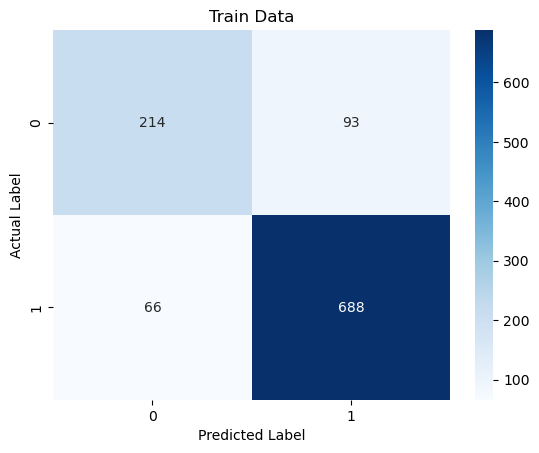

In [1388]:
# Get the confusion matrix on the train data
plt.style.use('default')
sns.heatmap((metrics.confusion_matrix(train_labels,ADB_model.predict(X_train))),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Train Data')
plt.show()

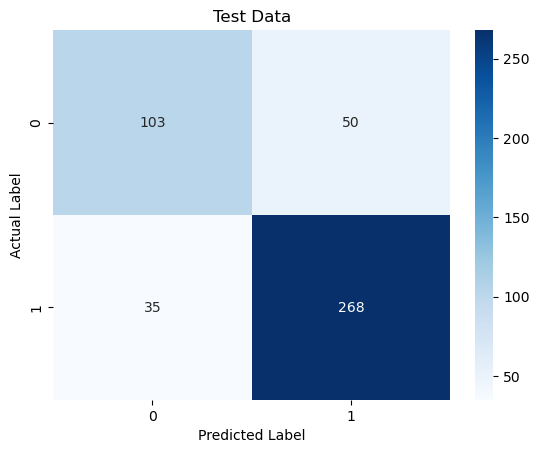

In [1389]:
# Get the confusion matrix on the train data
plt.style.use('default')
sns.heatmap((metrics.confusion_matrix(test_labels,ADB_model.predict(X_test))),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Test Data')
plt.show()

AUC: 0.91


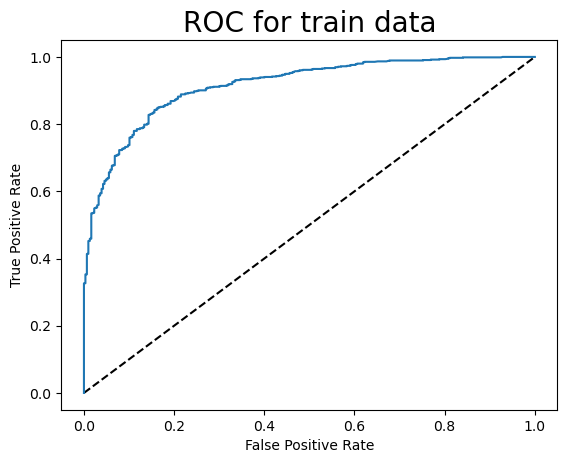

In [1390]:

# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Ada_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.2f' % Ada_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.style.use('fivethirtyeight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for train data')
plt.show()


AUC: 0.88


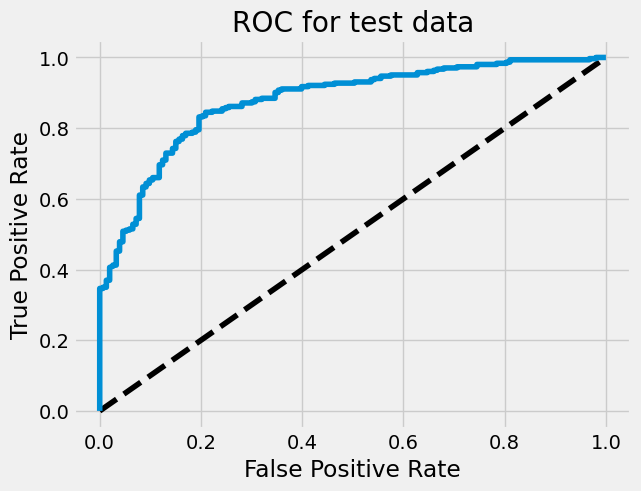

In [1391]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Ada_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.2f' % Ada_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot the roc curve for the model
plt.style.use('fivethirtyeight')
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for test data')
plt.show()


#### Gradient Boosting

In [1392]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl_sc = GradientBoostingClassifier(random_state=1)
gbcl_sc = gbcl_sc.fit(X_train_k, y_train_k)

In [1393]:
#Train Data Accuracy
gbcl_train_acc=gbcl_sc.score(X_train_k, y_train_k)
print('AUC: %.2f' % gbcl_train_acc)

AUC: 0.89


In [1394]:
#Test Data Accuracy
gbcl_test_acc=gbcl_sc.score(X_test_k, y_test_k)
print('AUC: %.2f' % gbcl_test_acc)

AUC: 0.83


In [1395]:
## Performance Matrix on train data set
y_train_predict = gbcl_sc.predict(X_train_k)
model_score =gbcl_sc.score(X_train_k, y_train_k)
print(model_score)
print(metrics.confusion_matrix(y_train_k, y_train_predict),'\n')
print('Training Data report:\n\n',metrics.classification_report(y_train_k,y_train_predict),'\n')

0.8925541941564562
[[239  68]
 [ 46 708]] 

Training Data report:

               precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061
 



In [1396]:
gbcl_sc_metrics_C1=metrics.classification_report(y_train_k,y_train_predict,output_dict=True)
gbcl_sc_metrics_train=pd.DataFrame(gbcl_sc_metrics_C1).transpose()
gbcl_sc_train_f1_C1=round(gbcl_sc_metrics_train.loc["1"][2],2)
gbcl_sc_train_recall_C1=round(gbcl_sc_metrics_train.loc["1"][1],2)
gbcl_sc_train_precision_C1=round(gbcl_sc_metrics_train.loc["1"][0],2)
print ('gbcl_sc_train_precision ',gbcl_sc_train_precision_C1)
print ('gbcl_sc_train_recall ',gbcl_sc_train_recall_C1)
print ('gbcl_sc_train_f1 ',gbcl_sc_train_f1_C1)
print('\n')
gbcl_sc_metrics_C0=classification_report(y_train_k,y_train_predict,output_dict=True)
gbcl_sc_metrics_train=pd.DataFrame(gbcl_sc_metrics_C0).transpose()
gbcl_sc_train_f1_C0=round(gbcl_sc_metrics_train.loc["0"][2],2)
gbcl_sc_train_recall_C0=round(gbcl_sc_metrics_train.loc["0"][1],2)
gbcl_sc_train_precision_C0=round(gbcl_sc_metrics_train.loc["0"][0],2)
print ('gbcl_sc_train_precision ',gbcl_sc_train_precision_C0)
print ('gbcl_sc_train_recall ',gbcl_sc_train_recall_C0)
print ('gbcl_sc_train_f1 ',gbcl_sc_train_f1_C0)

gbcl_sc_train_precision  0.91
gbcl_sc_train_recall  0.94
gbcl_sc_train_f1  0.93


gbcl_sc_train_precision  0.84
gbcl_sc_train_recall  0.78
gbcl_sc_train_f1  0.81


In [1397]:
## Performance Matrix on test data set
y_test_predict = gbcl_sc.predict(X_test_k)
model_score =gbcl_sc.score(X_test_k, y_test_k)
print(model_score)
print(metrics.confusion_matrix(y_test_k, y_test_predict),'\n')
print('Testing Data report:\n\n',metrics.classification_report(y_test_k,y_test_predict),'\n')

0.8333333333333334
[[104  49]
 [ 27 276]] 

Testing Data report:

               precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [1398]:
gbcl_sc_metrics_C1=metrics.classification_report(y_test_k,y_test_predict,output_dict=True)
gbcl_sc_metrics_test=pd.DataFrame(gbcl_sc_metrics_C1).transpose()
gbcl_sc_test_f1_C1=round(gbcl_sc_metrics_test.loc["1"][2],2)
gbcl_sc_test_recall_C1=round(gbcl_sc_metrics_test.loc["1"][1],2)
gbcl_sc_test_precision_C1=round(gbcl_sc_metrics_test.loc["1"][0],2)
print ('gbcl_sc_test_precision ',gbcl_sc_test_precision_C1)
print ('gbcl_sc_test_recall ',gbcl_sc_test_recall_C1)
print ('gbcl_sc_test_f1 ',gbcl_sc_test_f1_C1)
print('\n')
gbcl_sc_metrics_C0=classification_report(y_test_k,y_test_predict,output_dict=True)
gbcl_sc_metrics_test=pd.DataFrame(gbcl_sc_metrics_C0).transpose()
gbcl_sc_test_f1_C0=round(gbcl_sc_metrics_test.loc["0"][2],2)
gbcl_sc_test_recall_C0=round(gbcl_sc_metrics_test.loc["0"][1],2)
gbcl_sc_test_precision_C0=round(gbcl_sc_metrics_test.loc["0"][0],2)
print ('gbcl_sc_test_precision ',gbcl_sc_test_precision_C0)
print ('gbcl_sc_test_recall ',gbcl_sc_test_recall_C0)
print ('gbcl_sc_test_f1 ',gbcl_sc_test_f1_C0)

gbcl_sc_test_precision  0.85
gbcl_sc_test_recall  0.91
gbcl_sc_test_f1  0.88


gbcl_sc_test_precision  0.79
gbcl_sc_test_recall  0.68
gbcl_sc_test_f1  0.73


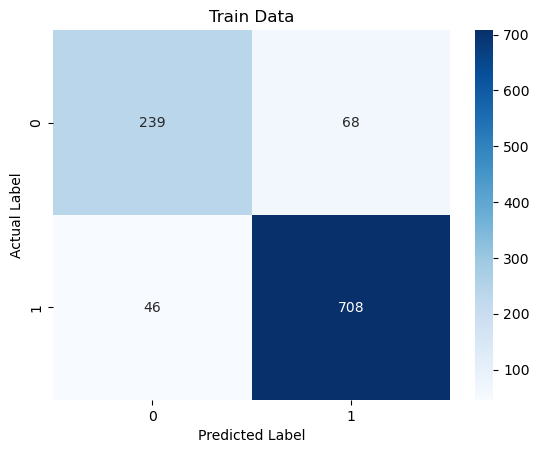

In [1399]:
# Get the confusion matrix on the train data
plt.style.use('default')
sns.heatmap((metrics.confusion_matrix(y_train_k,gbcl_sc.predict(X_train_k))),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Train Data')
plt.show()

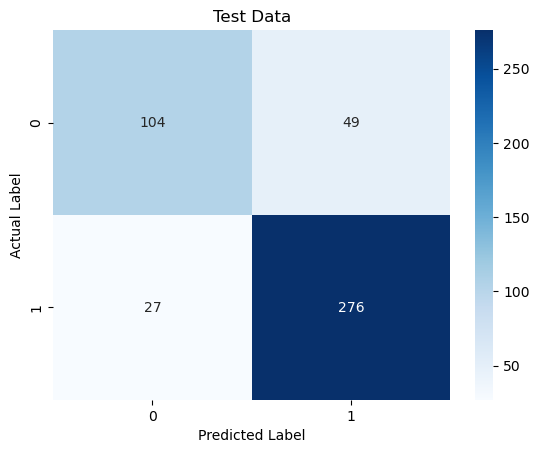

In [1400]:
# Get the confusion matrix on the test data
# Get the confusion matrix on the test data
plt.style.use('default')
sns.heatmap((metrics.confusion_matrix(y_test_k,gbcl_sc.predict(X_test_k))),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Test Data')
plt.show()

AUC: 0.95


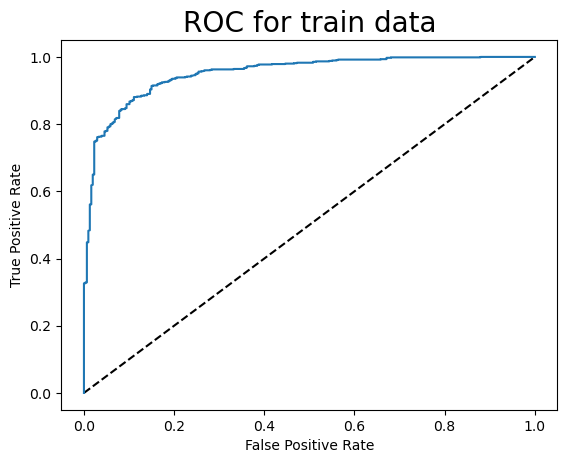

In [1401]:

# predict probabilities
probs = gbcl_sc.predict_proba(X_train_k)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbcl_sc_train_auc = roc_auc_score(y_train_k, probs)
print('AUC: %.2f' % gbcl_sc_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_k, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.style.use('fivethirtyeight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for train data')
plt.show()


AUC: 0.90


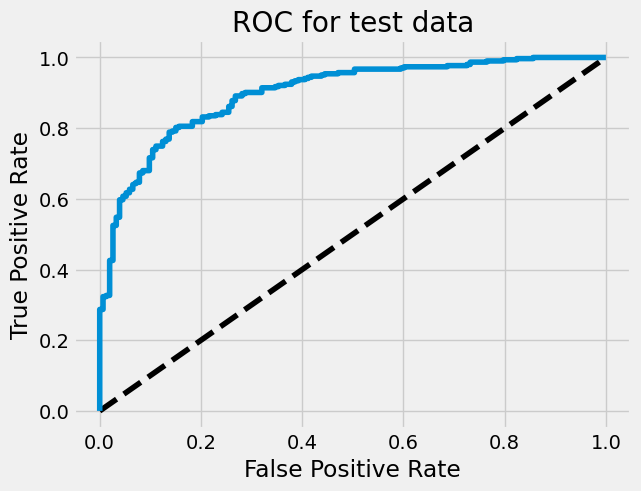

In [1402]:

# predict probabilities
probs = gbcl_sc.predict_proba(X_test_k)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbcl_sc_test_auc = roc_auc_score(y_test_k, probs)
print('AUC: %.2f' % gbcl_sc_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_k, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.style.use('fivethirtyeight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for test data')
plt.show()


In [1443]:
index=['Recall','Precision','F1 Score','Accuracy', 'AUC']
data_0= pd.DataFrame({'LR Train':[lr_train_precision_C0 ,lr_train_recall_C0,lr_train_f1_C0,lr_train_acc,lr_train_auc],
        'LR Test':[lr_test_precision_C0 ,lr_test_recall_C0,lr_test_f1_C0,lr_test_acc,lr_test_auc],
        'LR_Tuned_Train':[lrt_train_precision_C0 ,lrt_train_recall_C0,lrt_train_f1_C0,lrt_train_acc,lrt_train_auc],
        'LR_Tuned_Test':[lrt_test_precision_C0 ,lrt_test_recall_C0,lrt_test_f1_C0,lrt_test_acc,lrt_test_auc],                        
        'LDA Train':[lda_train_precision_C0,lda_train_recall_C0,lda_train_f1_C0,lda_train_acc,lda_train_auc],
        'LDA Test':[lda_train_precision_C0,lda_train_recall_C0,lda_train_f1_C0,lda_test_acc,lda_test_auc ],
        'LDA_Tuned_Train':[lda2_train_precision_C0,lda2_train_recall_C0,lda2_train_f1_C0,lda2_train_score,lda2_train_auc],
        'LDA_Tuned_Test':[lda2_train_precision_C0,lda2_train_recall_C0,lda2_train_f1_C0,lda2_test_score,lda2_test_auc ],             
        'KNN Train':[knn_train_precision_C0,knn_train_recall_C0,knn_train_f1_C0,knn_train_acc,knn_train_auc],
        'KNN_Test':[knn_test_precision_C0,knn_test_recall_C0,knn_test_f1_C0,knn_test_acc,knn_test_auc ],
        'KNN_Tuned_Train':[knnt_train_precision_C0,knnt_train_recall_C0,knnt_train_f1_C0,knnt_train_acc,knnt_train_auc],
        'KNN_Tunned_Test':[knnt_test_precision_C0,knnt_test_recall_C0,knnt_test_f1_C0,knnt_test_acc,knnt_test_auc ],
        'NB Train':[Nb_train_precision_C0,Nb_train_recall_C0,Nb_train_f1_C0, Nb_train_acc,Nb_train_auc],
        'NB Test':[Nb_test_precision_C0,Nb_test_recall_C0,Nb_test_f1_C0, Nb_test_acc,Nb_test_auc],
        'NB_Smote_Train':[nbs_train_precision_C0,nbs_train_recall_C0,nbs_train_f1_C0, Nbs_train_acc,Nbs_train_auc],
        'NB_Smote_Test':[nbs_test_precision_C0,nbs_test_recall_C0,nbs_test_f1_C0, Nbs_test_acc,Nbs_test_auc],             
        'BAGGING Train':[Bagging_train_precision_C0,Bagging_train_recall_C0,Bagging_train_f1_C0,Bagging_train_acc,Bagging_train_auc],
        'BAGGING Test':[Bagging_test_precision_C0,Bagging_test_recall_C0,Bagging_test_f1_C0,Bagging_test_acc,Bagging_test_auc],
        'ADA Train':[Ada_train_precision_C0,Ada_train_recall_C0,Ada_train_f1_C0,Ada_train_acc,Ada_train_auc],
        'ADA Test':[Ada_test_precision_C0,Ada_test_recall_C0,Ada_test_f1_C0,Ada_test_acc,Ada_test_auc ],
        'Gradient Train':[gbcl_sc_train_precision_C0,gbcl_sc_train_recall_C0,gbcl_sc_train_f1_C0,gbcl_train_acc,gbcl_sc_train_auc],
        'Gradient Test':[gbcl_sc_test_precision_C0,gbcl_sc_test_recall_C0,gbcl_sc_test_f1_C0,gbcl_test_acc,gbcl_sc_test_auc]},index=index)   

In [1444]:
round(data_0,2).T

,Recall,Precision,F1 Score,Accuracy,AUC
LR Train,0.75,0.65,0.70,0.84,0.89
LR Test,0.75,0.72,0.74,0.83,0.88
LR_Tuned_Train,0.76,0.64,0.70,0.84,0.89
LR_Tuned_Test,0.76,0.72,0.74,0.83,0.88
LDA Train,0.74,0.65,0.69,0.83,0.89
LDA Test,0.74,0.65,0.69,0.83,0.89
LDA_Tuned_Train,0.80,0.57,0.67,0.83,0.76
LDA_Tuned_Test,0.80,0.57,0.67,0.83,0.79
KNN Train,0.77,0.72,0.74,0.86,0.93
KNN_Test,0.75,0.70,0.72,0.82,0.87


In [1441]:
index=['Recall','Precision','F1 Score','Accuracy', 'AUC']
data_1= pd.DataFrame({'LR Train':[lr_train_precision_C1 ,lr_train_recall_C1,lr_train_f1_C1,lr_train_acc,lr_train_auc],
        'LR Test':[lr_test_precision_C1 ,lr_test_recall_C1,lr_test_f1_C1,lr_test_acc,lr_test_auc],
        'LR_Tuned_Train':[lrt_train_precision_C1 ,lrt_train_recall_C1,lrt_train_f1_C1,lrt_train_acc,lrt_train_auc],
        'LR_Tuned_Test':[lrt_test_precision_C1 ,lrt_test_recall_C1,lrt_test_f1_C1,lrt_test_acc,lrt_test_auc],                        
        'LDA Train':[lda_train_precision_C1,lda_train_recall_C1,lda_train_f1_C1,lda_train_acc,lda_train_auc],
        'LDA Test':[lda_train_precision_C1,lda_train_recall_C1,lda_train_f1_C1,lda_test_acc,lda_test_auc ],
        'LDA_Tuned_Train':[lda2_train_precision_C1,lda2_train_recall_C1,lda2_train_f1_C1,lda2_train_score,lda2_train_auc],
        'LDA_Tuned_Test':[lda2_train_precision_C1,lda2_train_recall_C1,lda2_train_f1_C1,lda2_test_score,lda2_test_auc ],             
        'KNN Train':[knn_train_precision_C1,knn_train_recall_C1,knn_train_f1_C1,knn_train_acc,knn_train_auc],
        'KNN_Test':[knn_test_precision_C1,knn_test_recall_C1,knn_test_f1_C1,knn_test_acc,knn_test_auc ],
        'KNN_Tuned_Train':[knnt_train_precision_C1,knnt_train_recall_C1,knnt_train_f1_C1,knnt_train_acc,knnt_train_auc],
        'KNN_Tunned_Test':[knnt_test_precision_C1,knnt_test_recall_C1,knnt_test_f1_C1,knnt_test_acc,knnt_test_auc ],
        'NB Train':[Nb_train_precision_C1,Nb_train_recall_C1,Nb_train_f1_C1, Nb_train_acc,Nb_train_auc],
        'NB Test':[Nb_test_precision_C1,Nb_test_recall_C1,Nb_test_f1_C1, Nb_test_acc,Nb_test_auc],
        'NB_Smote_Train':[nbs_train_precision_C1,nbs_train_recall_C1,nbs_train_f1_C1, Nbs_train_acc,Nbs_train_auc],
        'NB_Smote_Test':[nbs_test_precision_C1,nbs_test_recall_C1,nbs_test_f1_C1, Nbs_test_acc,Nbs_test_auc],             
        'BAGGING Train':[Bagging_train_precision_C1,Bagging_train_recall_C1,Bagging_train_f1_C1,Bagging_train_acc,Bagging_train_auc],
        'BAGGING Test':[Bagging_test_precision_C1,Bagging_test_recall_C1,Bagging_test_f1_C1,Bagging_test_acc,Bagging_test_auc],
        'ADA Train':[Ada_train_precision_C1,Ada_train_recall_C1,Ada_train_f1_C1,Ada_train_acc,Ada_train_auc],
        'ADA Test':[Ada_test_precision_C1,Ada_test_recall_C1,Ada_test_f1_C1,Ada_test_acc,Ada_test_auc ],
        'Gradient Train':[gbcl_sc_train_precision_C1,gbcl_sc_train_recall_C1,gbcl_sc_train_f1_C1,gbcl_train_acc,gbcl_sc_train_auc],
        'Gradient Test':[gbcl_sc_test_precision_C1,gbcl_sc_test_recall_C1,gbcl_sc_test_f1_C1,gbcl_test_acc,gbcl_sc_test_auc]},index=index)   

In [1442]:
round(data_1,2).T

,Recall,Precision,F1 Score,Accuracy,AUC
LR Train,0.86,0.91,0.89,0.84,0.89
LR Test,0.86,0.88,0.87,0.83,0.88
LR_Tuned_Train,0.86,0.92,0.89,0.84,0.89
LR_Tuned_Test,0.86,0.88,0.87,0.83,0.88
LDA Train,0.86,0.91,0.89,0.83,0.89
LDA Test,0.86,0.91,0.89,0.83,0.89
LDA_Tuned_Train,0.84,0.94,0.89,0.83,0.76
LDA_Tuned_Test,0.84,0.94,0.89,0.83,0.79
KNN Train,0.89,0.91,0.90,0.86,0.93
KNN_Test,0.85,0.88,0.87,0.82,0.87


In [1445]:
index=['Recall','Precision','F1 Score','Accuracy', 'AUC']
final_train_data= pd.DataFrame({'KNN_Tuned_Train':[knnt_train_precision_C0,knnt_train_recall_C0,knnt_train_f1_C0,knnt_train_acc,knnt_train_auc],
        'KNN_Tunned_Test':[knnt_test_precision_C0,knnt_test_recall_C0,knnt_test_f1_C0,knnt_test_acc,knnt_test_auc ]},index=index)  

In [1439]:
round(final_train_data,2)

,KNN_Tuned_Train,KNN_Tunned_Test
Recall,0.75,0.81
Precision,0.65,0.69
F1 Score,0.70,0.75
Accuracy,0.84,0.84
AUC,0.90,0.89


In [1440]:
index=['Recall','Precision','F1 Score','Accuracy', 'AUC']
final_test_data= pd.DataFrame({'KNN_Tuned_Train':[knnt_train_precision_C1,knnt_train_recall_C1,knnt_train_f1_C1,knnt_train_acc,knnt_train_auc],
        'KNN_Tunned_Test':[knnt_test_precision_C1,knnt_test_recall_C1,knnt_test_f1_C1,knnt_test_acc,knnt_test_auc ]},index=index)  

In [1433]:
round(final_test_data,2)

,KNN_Tuned_test,KNN_Tunned_Test
Recall,0.86,0.86
Precision,0.92,0.92
F1 Score,0.89,0.89
Accuracy,0.84,0.84
AUC,0.89,0.89
